# **Summary**
The price of the diamond of professor's interest is around $2900.  


Carat, Clarity, and Color are the major determinants of a diamond's price.


The 'Price' column of the data is of type string. So, I had to chop off the dollar sign and then convert it to the numeric data type. The data also has some missing values in certain variables.  

In [461]:
# installing packages
install.packages("dplyr")
install.packages("fastDummies")
install.packages("ggplot2")
install.packages('tidyr')
install.packages("diptest")
install.packages('LaplacesDemon')
install.packages('mousetrap')
install.packages('multimode')
install.packages('haven')
install.packages('datasets')
install.packages('jtools')
install.packages('car')

# importing packages
library(dplyr)
library(fastDummies)
library(ggplot2)
library(tidyr)
library(diptest)
library(LaplacesDemon)
library(mousetrap)
library(multimode)
library(haven)
library(datasets)
library(jtools)
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

In [339]:
# reading data
df <- read.csv("https://raw.githubusercontent.com/meetgojiya98/Business_Analytics_MBA6636/main/Assignment%201/MBA6636_SM21_Professor_Proposes_Data.csv")
head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,0.92,I,SI2,G,AGS,V,V,"$3,000",1
2,0.92,I,SI2,V,AGS,G,G,"$3,000",1
3,0.82,F,SI2,I,GIA,X,X,"$3,004",1
4,0.81,G,SI1,I,GIA,X,V,"$3,004",1
5,0.90,J,VS2,V,GIA,V,V,"$3,006",1
6,0.87,F,SI2,I,AGS,G,V,"$3,007",1


In [340]:
# checking the structure of the data
str(df)

'data.frame':	441 obs. of  9 variables:
 $ Carat        : num  0.92 0.92 0.82 0.81 0.9 0.87 0.8 0.84 0.8 0.8 ...
 $ Colour       : chr  "I" "I" "F" "G" ...
 $ Clarity      : chr  "SI2" "SI2" "SI2" "SI1" ...
 $ Cut          : chr  "G" "V" "I" "I" ...
 $ Certification: chr  "AGS" "AGS" "GIA" "GIA" ...
 $ Polish       : chr  "V" "G" "X" "X" ...
 $ Symmetry     : chr  "V" "G" "X" "V" ...
 $ Price        : chr  "$3,000" "$3,000" "$3,004" "$3,004" ...
 $ Wholesaler   : int  1 1 1 1 1 1 1 1 1 1 ...


In [341]:
# getting the high level overview of the data frame
summary(df)

     Carat           Colour            Clarity              Cut           
 Min.   :0.0900   Length:441         Length:441         Length:441        
 1st Qu.:0.3000   Class :character   Class :character   Class :character  
 Median :0.8100   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.6693                                                           
 3rd Qu.:1.0100                                                           
 Max.   :1.5800                                                           
 NA's   :1                                                                
 Certification         Polish            Symmetry            Price          
 Length:441         Length:441         Length:441         Length:441        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

In [342]:
# Checking if the data frame has any missing values
any(is.na(df))

[1] TRUE

In [343]:
#changing the type of 'Price' variable to numeric type and removing the '$' sign
df$Price = as.numeric(gsub('[$,]', '', df$Price))
head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,0.92,I,SI2,G,AGS,V,V,3000,1
2,0.92,I,SI2,V,AGS,G,G,3000,1
3,0.82,F,SI2,I,GIA,X,X,3004,1
4,0.81,G,SI1,I,GIA,X,V,3004,1
5,0.90,J,VS2,V,GIA,V,V,3006,1
6,0.87,F,SI2,I,AGS,G,V,3007,1


# Univariate Analysis




In [344]:
# Checking if there are any missing values in Price variable
any(is.na(df$Price))

[1] TRUE

In [345]:
#Filling in missing values 
df <- df %>% fill(Price, .direction = 'down')

# Five number summary of Price variable
summary(df$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    160     520    2168    1714    3012    3145 

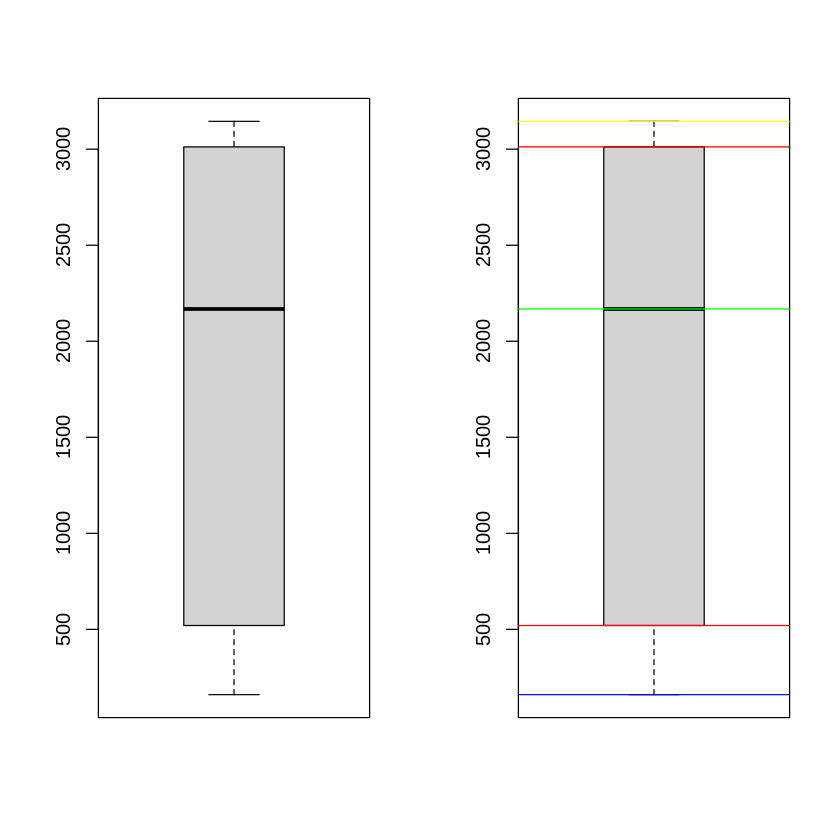

In [346]:
# Visualizing the five number summary of Price variable
par(mfrow = c(1, 2))
boxplot(df$Price)
boxplot(df$Price)
abline(h = min(df$Price), col = "Blue")
abline(h = max(df$Price), col = "Yellow")
abline(h = median(df$Price), col = "Green")
abline(h = quantile(df$Price, c(0.25, 0.75)), col = "Red")

In [347]:
# conducting Hartigans’ dip test for unimodality or multimodality with dip.test() on Price variable
dip.test(df$Price)


	Hartigans' dip test for unimodality / multimodality

data:  df$Price
D = 0.14742, p-value < 2.2e-16
alternative hypothesis: non-unimodal, i.e., at least bimodal


In [348]:
# Checking if the data in Price variable is unimodal
is.unimodal(df$Price)

[1] FALSE

In [349]:
# Checking if the data in Price variable is multimodal
is.multimodal(df$Price)

[1] TRUE

In [350]:
# Checking if the data in Price variable is bimodal
is.bimodal(df$Price)

[1] TRUE

In [351]:
# Finding the biomodal coefficient for the Price variable
bimodality_coefficient(df$Price)

[1] 0.8423341

Warning message in locmodes(df$Price, mod0 = 2, display = TRUE):
“If the density function has an unbounded support, artificial modes may have been created in the tails”



Estimated location
Modes:  502.037  3062.457 
Antimode: 1301.721 

Estimated value of the density
Modes: 0.0008867333  0.000625761 
Antimode: 1.591409e-07 

Critical bandwidth: 175.7248


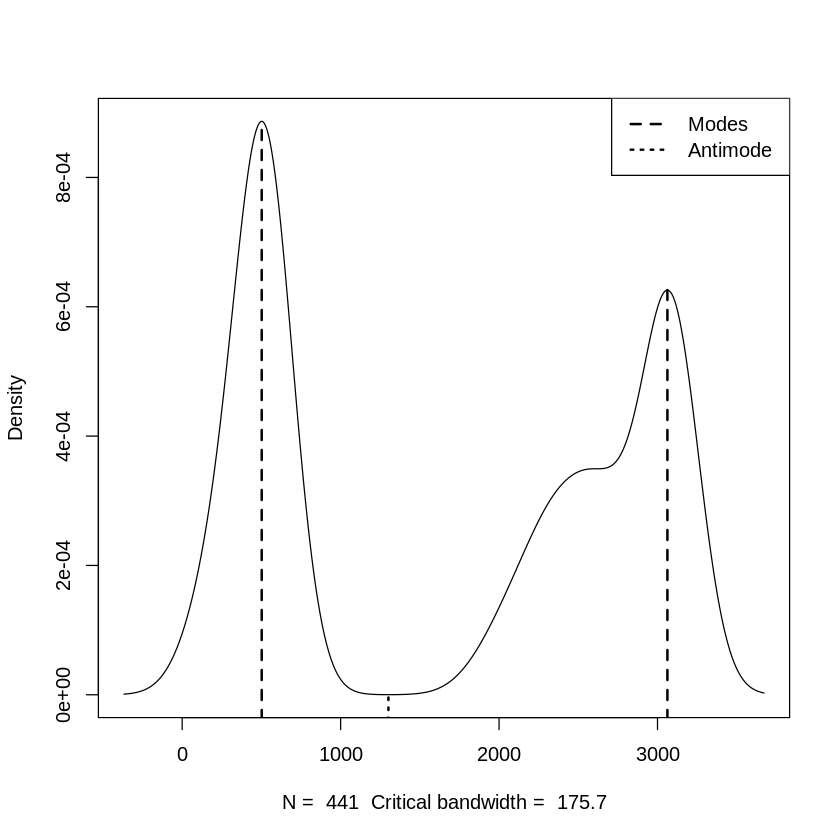

In [352]:
# Visuailzing multimodal Price data
locmodes(df$Price,mod0=2,display=TRUE)

**Price**: The price of the diamond ranges from \$160 to \$3145. Price variable has 1 missing value. According to result of Hartigans’ dip test, there is enough evidence to reject null hypothesis since p-value is smaller than alpha. That is, the data are not unimodal.The result obtained from is.bimodal() function is TRUE. That means, the data are bimodal. The bimodality coefficient is obtained as 0.842334. If this value is larger than 0.555, it indicates bimodality of data.The diamonds appear to be in two clusters less than \$1000 and higher than \$1000. 

In [353]:
# Checking if there are any missing values in Carat variable
any(is.na(df$Carat))

[1] TRUE

In [354]:
#Filling in missing values in Carat Variable
df <- df %>% fill(Carat, .direction = 'down')

# Five number summary of Carat variable
summary(df$Carat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0900  0.3000  0.8100  0.6684  1.0100  1.5800 

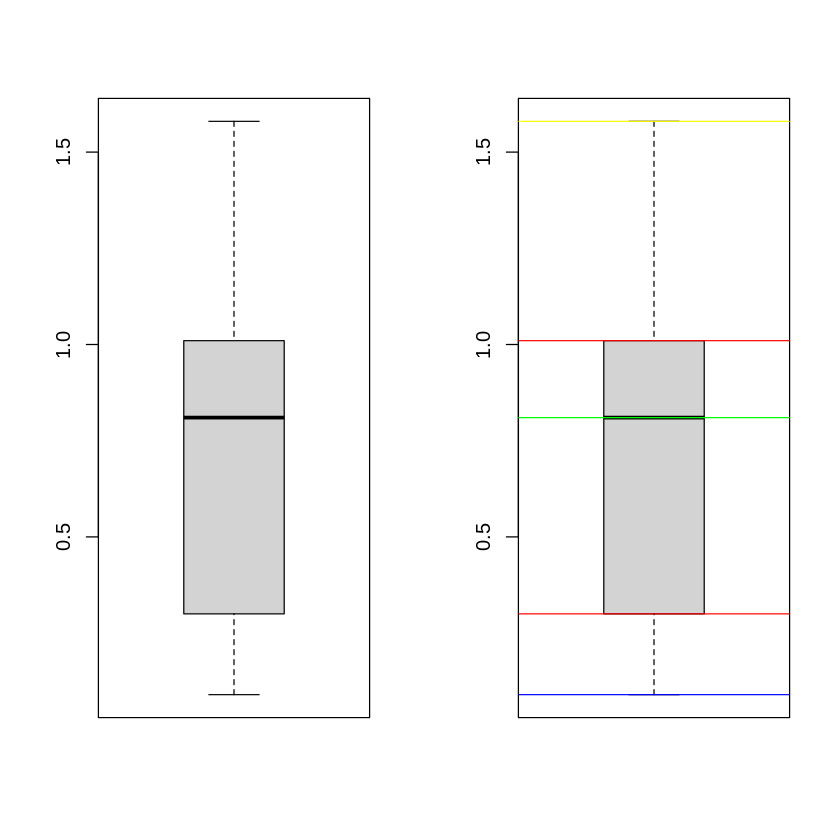

In [355]:
# Visualizing the five number summary of Carat variable
par(mfrow = c(1, 2))
boxplot(df$Carat)
boxplot(df$Carat)
abline(h = min(df$Carat), col = "Blue")
abline(h = max(df$Carat), col = "Yellow")
abline(h = median(df$Carat), col = "Green")
abline(h = quantile(df$Carat, c(0.25, 0.75)), col = "Red")

In [356]:
# conducting Hartigans’ dip test for unimodality or multimodality with dip.test() on Carat variable
dip.test(df$Carat)


	Hartigans' dip test for unimodality / multimodality

data:  df$Carat
D = 0.14502, p-value < 2.2e-16
alternative hypothesis: non-unimodal, i.e., at least bimodal


In [357]:
# Checking if the data in Carat variable is unimodal
is.unimodal(df$Carat)

[1] FALSE

In [358]:
# Checking if the data in Carat variable is multimodal
is.multimodal(df$Carat)

[1] TRUE

In [359]:
# Checking if the data in Carat variable is bimodal
is.bimodal(df$Carat)

[1] TRUE

In [360]:
# Finding the biomodal coefficient for the Carat variable
bimodality_coefficient(df$Carat)

[1] 0.7403436

Warning message in locmodes(df$Carat, mod0 = 2, display = TRUE):
“If the density function has an unbounded support, artificial modes may have been created in the tails”



Estimated location
Modes: 0.2951295  1.014429 
Antimode: 0.5644852 

Estimated value of the density
Modes: 2.493535  2.086865 
Antimode: 0.0003398664 

Critical bandwidth: 0.06044006


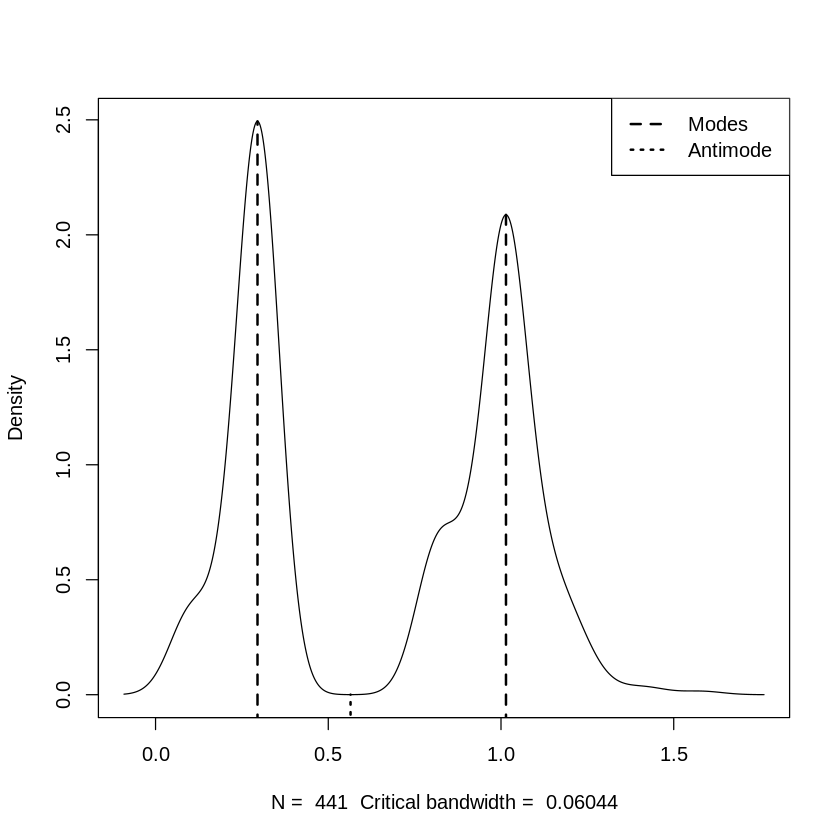

In [361]:
# Visuailzing multimodal Carat data
locmodes(df$Carat,mod0=2,display=TRUE)

**Carat**: The carat ranges from 0.09 to 1.58. Carat variable has missing values. According to result of Hartigans’ dip test, there is enough evidence to reject null hypothesis since p-value is smaller than alpha. That is, the data are not unimodal.The result obtained from is.bimodal() function is TRUE. That means, the data are bimodal. The bimodality coefficient is obtained as 0.7403435. If this value is larger than 0.555, it indicates bimodality of data. The diamonds appear to be in two clusters 0.09 to 0.30 and 0.81 to 1.58 carats.

In [362]:
# Checking if there are any missing values in Clarity variable
any(is.na(df$Clarity))

[1] FALSE

In [363]:
# Generating frequency table for Clarity variable
factor(df$Clarity)
clarityFreq = table(df$Clarity)
dfClarityFreq = as.data.frame(clarityFreq)
names(dfClarityFreq)[1] = 'clarity'
dfClarityFreq

[1] SI2  SI2  SI2  SI1  VS2  SI2  SI2  SI1  SI2  SI2  SI2  SI2  VS1  SI1  SI1 
 [16] SI1  SI1  SI1  SI2  SI2  SI2  VS1  VS1  SI1  SI1  SI2  SI2  VS2  SI1  SI2 
 [31] SI2  SI2  SI2  SI2  SI1  SI2  SI2  SI2  VS1  SI1  SI2  VS1  VS1  SI2  VS2 
 [46] SI2  VS1  SI2  SI2  SI2  SI1  SI2  SI1  VS2  SI2  SI1  VS2  SI1  SI2  SI1 
 [61] SI3  SI3  I2   I2   I1   I1   I2   I2   I2   I2   I1   I2   I1   I1   SI3 
 [76] I1   I1   SI3  I2   I1   I1   I1   I1   I2   I1   I1   I1   I1   I2   I2  
 [91] SI3  I1   I2   I1   I1   SI3  I2   I1   I2   SI3  I2   I2   I1   I2   I1  
[106] I1   I1   I1   I1   SI2  SI2  I1   SI3  I1   I2   I1   I1   I2   I2   SI3 
[121] SI3  I1   I1   I1   I1   I1   SI2  SI1  I1   I1   I1   VS2  SI3  I1   I1  
[136] SI2  SI3  I1   I2   SI2  SI2  SI2  SI2  I1   SI3  SI1  I1   I1   SI1  SI3 
[151] SI3  SI2  I1   VS1  SI2  I1   I1   I1   SI2  SI2  SI3  SI2  SI2  SI2  I1  
[166] I1   SI2  SI2  SI3  SI2  SI2  SI2  SI2  SI2  SI2  SI2  I1   I1   SI1  SI1 
[181] I1   SI2  SI3  SI2  I1   I1   I2   SI3  I1   I1   I1   I1   I2   I1   I1  
[196] I1   I1   SI2  SI3  I2   I1   SI3  I2   I2   I1   SI3  I1   I1   SI2  SI3 
[211] I1   SI3  VS2  SI3  SI1  SI3  SI2  I1   SI1  I1   I1   I1   I1   I2   I2  
[226] SI1  I1   SI2  SI2  I1   I1   SI2  SI2  I1   SI2  I1   I1   I1   SI1  SI1 
[241] SI1  SI1  SI1  SI1  VS1  VS2  VS1  VS2  VS2  SI1  SI1  SI1  SI2  VS1  VS1 
[256] SI1  VS1  VS2  SI1  VS2  SI1  VS2  SI1  SI1  SI1  SI1  VS2  VVS2 SI1  VS2 
[271] VS2  SI1  SI1  SI1  SI1  SI1  SI1  VVS2 SI1  SI1  VS2  SI1  SI1  VS2  VVS2
[286] VVS2 I1   SI2  SI2  SI2  I1   SI1  SI1  SI1  VS1  VS2  SI2  SI2  SI1  SI1 
[301] SI1  SI1  SI1  I1   SI2  SI2  SI2  SI2  SI2  SI2  SI1  SI2  VS2  VS2  VS2 
[316] VS2  VS2  VS2  SI2  SI2  SI2  SI1  SI1  SI2  SI2  SI2  SI2  SI2  SI2  SI2 
[331] SI2  SI2  SI2  SI2  SI2  SI2  SI2  SI1  SI1  SI1  SI1  SI2  SI2  SI2  SI2 
[346] SI2  SI2  SI2  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1 
[361] SI1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1 
[376] VS1  VS1  VVS2 SI2  SI1  SI1  SI1  SI1  SI2  SI1  SI2  SI2  SI1  SI1  SI1 
[391] SI1  SI1  SI1  VS2  SI2  SI2  SI2  SI2  SI1  SI1  SI1  SI1  SI1  SI1  SI1 
[406] SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  VS2 
[421] VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VVS1
[436] VVS1 SI1  SI1  SI1  SI1      
Levels:  I1 I2 SI1 SI2 SI3 VS1 VS2 VVS1 VVS2

clarity,Freq
<fct>,<int>
,1
I1,82
I2,28
SI1,116
SI2,110
SI3,26
VS1,30
VS2,41
VVS1,2


In [364]:
# Clubbing the 'I2' clarity type into 'I1', 'VVS1' and 'VVS2' clarity type into 'VS2' and creating a new variable
df <- df %>%
  mutate(ClarityN = case_when(
    startsWith(Clarity, "I1") ~ "I1",
    startsWith(Clarity, "I2") ~ "I1",
    startsWith(Clarity, "VVS1") ~ "VS2",
    startsWith(Clarity, "VVS2") ~ "VS2",
    startsWith(Clarity, "SI1") ~ "SI1",
    startsWith(Clarity, "SI2") ~ "SI2",
    startsWith(Clarity, "SI3") ~ "SI2",
    startsWith(Clarity, "VS1") ~ "VS1",
    startsWith(Clarity, "VS2") ~ "VS2"
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2


In [365]:
# Generating frequency table for ClarityN variable
factor(df$ClarityN)
clarityNFreq = table(df$ClarityN)
dfClarityNFreq = as.data.frame(clarityNFreq)
names(dfClarityNFreq)[1] = 'clarityN'
dfClarityNFreq

[1] SI2  SI2  SI2  SI1  VS2  SI2  SI2  SI1  SI2  SI2  SI2  SI2  VS1  SI1  SI1 
 [16] SI1  SI1  SI1  SI2  SI2  SI2  VS1  VS1  SI1  SI1  SI2  SI2  VS2  SI1  SI2 
 [31] SI2  SI2  SI2  SI2  SI1  SI2  SI2  SI2  VS1  SI1  SI2  VS1  VS1  SI2  VS2 
 [46] SI2  VS1  SI2  SI2  SI2  SI1  SI2  SI1  VS2  SI2  SI1  VS2  SI1  SI2  SI1 
 [61] SI2  SI2  I1   I1   I1   I1   I1   I1   I1   I1   I1   I1   I1   I1   SI2 
 [76] I1   I1   SI2  I1   I1   I1   I1   I1   I1   I1   I1   I1   I1   I1   I1  
 [91] SI2  I1   I1   I1   I1   SI2  I1   I1   I1   SI2  I1   I1   I1   I1   I1  
[106] I1   I1   I1   I1   SI2  SI2  I1   SI2  I1   I1   I1   I1   I1   I1   SI2 
[121] SI2  I1   I1   I1   I1   I1   SI2  SI1  I1   I1   I1   VS2  SI2  I1   I1  
[136] SI2  SI2  I1   I1   SI2  SI2  SI2  SI2  I1   SI2  SI1  I1   I1   SI1  SI2 
[151] SI2  SI2  I1   VS1  SI2  I1   I1   I1   SI2  SI2  SI2  SI2  SI2  SI2  I1  
[166] I1   SI2  SI2  SI2  SI2  SI2  SI2  SI2  SI2  SI2  SI2  I1   I1   SI1  SI1 
[181] I1   SI2  SI2  SI2  I1   I1   I1   SI2  I1   I1   I1   I1   I1   I1   I1  
[196] I1   I1   SI2  SI2  I1   I1   SI2  I1   I1   I1   SI2  I1   I1   SI2  SI2 
[211] I1   SI2  VS2  SI2  SI1  SI2  SI2  I1   SI1  I1   I1   I1   I1   I1   I1  
[226] SI1  I1   SI2  SI2  I1   I1   SI2  SI2  I1   SI2  I1   I1   I1   SI1  SI1 
[241] SI1  SI1  SI1  SI1  VS1  VS2  VS1  VS2  VS2  SI1  SI1  SI1  SI2  VS1  VS1 
[256] SI1  VS1  VS2  SI1  VS2  SI1  VS2  SI1  SI1  SI1  SI1  VS2  VS2  SI1  VS2 
[271] VS2  SI1  SI1  SI1  SI1  SI1  SI1  VS2  SI1  SI1  VS2  SI1  SI1  VS2  VS2 
[286] VS2  I1   SI2  SI2  SI2  I1   SI1  SI1  SI1  VS1  VS2  SI2  SI2  SI1  SI1 
[301] SI1  SI1  SI1  I1   SI2  SI2  SI2  SI2  SI2  SI2  SI1  SI2  VS2  VS2  VS2 
[316] VS2  VS2  VS2  SI2  SI2  SI2  SI1  SI1  SI2  SI2  SI2  SI2  SI2  SI2  SI2 
[331] SI2  SI2  SI2  SI2  SI2  SI2  SI2  SI1  SI1  SI1  SI1  SI2  SI2  SI2  SI2 
[346] SI2  SI2  SI2  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1 
[361] SI1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1  VS1 
[376] VS1  VS1  VS2  SI2  SI1  SI1  SI1  SI1  SI2  SI1  SI2  SI2  SI1  SI1  SI1 
[391] SI1  SI1  SI1  VS2  SI2  SI2  SI2  SI2  SI1  SI1  SI1  SI1  SI1  SI1  SI1 
[406] SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  SI1  VS2 
[421] VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2  VS2 
[436] VS2  SI1  SI1  SI1  SI1  <NA>
Levels: I1 SI1 SI2 VS1 VS2

clarityN,Freq
<fct>,<int>
I1,110
SI1,116
SI2,136
VS1,30
VS2,48


**Clarity**: This is an ordinal scaled data. In order to treat it as a nominal data, certain categories are clubbed together because the freuqency of those categories were very low. The 'I2' clarity type has been clubbed into 'I1', 'VVS1' and 'VVS2' clarity type into 'VS2'.

In [366]:
# Clubbing the colours into 4 categories and creating a new variable
df <- df %>%
  mutate(ColourN = case_when(
    startsWith(Colour, "D") ~ "Colorless",
    startsWith(Colour, "E") ~ "Colorless",
    startsWith(Colour, "F") ~ "Colorless",
    startsWith(Colour, "G") ~ "Near Colorless",
    startsWith(Colour, "H") ~ "Near Colorless",
    startsWith(Colour, "I") ~ "Near Colorless",
    startsWith(Colour, "J") ~ "Faint Yellow",
    startsWith(Colour, "K") ~ "Faint Yellow",
    startsWith(Colour, "L") ~ "Very Light Yellow"
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless


In [367]:
# Generating frequency table for ColourN variable
factor(df$ColourN)
ColourNFreq = table(df$ColourN)
dfColourNFreq = as.data.frame(ColourNFreq)
names(dfColourNFreq)[1] = 'ColourN'
dfColourNFreq

[1] Near Colorless    Near Colorless    Colorless         Near Colorless   
  [5] Faint Yellow      Colorless         Colorless         Colorless        
  [9] Colorless         Colorless         Near Colorless    Near Colorless   
 [13] Near Colorless    Near Colorless    Colorless         Faint Yellow     
 [17] Colorless         Near Colorless    Colorless         Colorless        
 [21] Colorless         Near Colorless    Near Colorless    Near Colorless   
 [25] Near Colorless    Near Colorless    Colorless         Near Colorless   
 [29] Near Colorless    Near Colorless    Near Colorless    Near Colorless   
 [33] Near Colorless    Colorless         Colorless         Colorless        
 [37] Colorless         Colorless         Near Colorless    Colorless        
 [41] Near Colorless    Near Colorless    Near Colorless    Colorless        
 [45] Faint Yellow      Colorless         Near Colorless    Near Colorless   
 [49] Near Colorless    Colorless         Near Colorless    Near Colorless   
 [53] Colorless         Near Colorless    Colorless         Near Colorless   
 [57] Near Colorless    Near Colorless    Near Colorless    Faint Yellow     
 [61] Very Light Yellow Very Light Yellow Faint Yellow      Near Colorless   
 [65] Faint Yellow      Faint Yellow      Near Colorless    Near Colorless   
 [69] Near Colorless    Near Colorless    Very Light Yellow Near Colorless   
 [73] Near Colorless    Faint Yellow      Near Colorless    Colorless        
 [77] Colorless         Very Light Yellow Colorless         Near Colorless   
 [81] Near Colorless    Near Colorless    Near Colorless    Near Colorless   
 [85] Near Colorless    Faint Yellow      Faint Yellow      Colorless        
 [89] Colorless         Very Light Yellow Faint Yellow      Near Colorless   
 [93] Near Colorless    Colorless         Faint Yellow      Faint Yellow     
 [97] Colorless         Near Colorless    Near Colorless    Faint Yellow     
[101] Colorless         Near Colorless    Colorless         Colorless        
[105] Near Colorless    Near Colorless    Near Colorless    Near Colorless   
[109] Faint Yellow      Faint Yellow      Faint Yellow      Colorless        
[113] Very Light Yellow Near Colorless    Faint Yellow      Near Colorless   
[117] Faint Yellow      Very Light Yellow Near Colorless    Faint Yellow     
[121] Colorless         Near Colorless    Near Colorless    Faint Yellow     
[125] Near Colorless    Near Colorless    Near Colorless    Faint Yellow     
[129] Near Colorless    Near Colorless    Near Colorless    Faint Yellow     
[133] Colorless         Colorless         Near Colorless    Near Colorless   
[137] Colorless         Colorless         Near Colorless    Faint Yellow     
[141] Faint Yellow      Faint Yellow      Faint Yellow      Near Colorless   
[145] Colorless         Faint Yellow      Colorless         Near Colorless   
[149] Faint Yellow      Near Colorless    Colorless         Near Colorless   
[153] Near Colorless    Faint Yellow      Faint Yellow      Faint Yellow     
[157] Colorless         Colorless         Near Colorless    Near Colorless   
[161] Near Colorless    Faint Yellow      Near Colorless    Near Colorless   
[165] Near Colorless    Colorless         Faint Yellow      Near Colorless   
[169] Colorless         Faint Yellow      Faint Yellow      Faint Yellow     
[173] Faint Yellow      Faint Yellow      Faint Yellow      Faint Yellow     
[177] Colorless         Near Colorless    Faint Yellow      Faint Yellow     
[181] Near Colorless    Faint Yellow      Faint Yellow      Faint Yellow     
[185] Colorless         Faint Yellow      Colorless         Faint Yellow     
[189] Colorless         Colorless         Colorless         Faint Yellow     
[193] Near Colorless    Near Colorless    Faint Yellow      Colorless        
[197] Very Light Yellow Faint Yellow      Colorless         Near Colorless   
[201] Near Colorless    Very Light Yellow Colorless         Faint Yellow     
[205] Faint Yellow      

ColourN,Freq
<fct>,<int>
Colorless,132
Faint Yellow,103
Near Colorless,193
Very Light Yellow,12


In [368]:
# Clubbing the colours into 2 categories and creating a new variable
df <- df %>%
  mutate(Colour2C = case_when(
    startsWith(ColourN, "Colorless") ~ "Colorless",
    startsWith(ColourN, "Near Colorless") ~ "Colorless",
    startsWith(ColourN, "Faint Yellow") ~ "Yellow",
    startsWith(ColourN, "Very Light Yellow") ~ "Yellow"
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless


In [370]:
# Generating frequency table for Colour2C variable
factor(df$Colour2C)
Colour2CFreq = table(df$Colour2C)
dfColour2CFreq = as.data.frame(Colour2CFreq)
names(dfColour2CFreq)[1] = 'Colour2C'
dfColour2CFreq

[1] Colorless Colorless Colorless Colorless Yellow    Colorless Colorless
  [8] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
 [15] Colorless Yellow    Colorless Colorless Colorless Colorless Colorless
 [22] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
 [29] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
 [36] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
 [43] Colorless Colorless Yellow    Colorless Colorless Colorless Colorless
 [50] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
 [57] Colorless Colorless Colorless Yellow    Yellow    Yellow    Yellow   
 [64] Colorless Yellow    Yellow    Colorless Colorless Colorless Colorless
 [71] Yellow    Colorless Colorless Yellow    Colorless Colorless Colorless
 [78] Yellow    Colorless Colorless Colorless Colorless Colorless Colorless
 [85] Colorless Yellow    Yellow    Colorless Colorless Yellow    Yellow   
 [92] Colorless Colorless Colorless Yellow    Yellow    Colorless Colorless
 [99] Colorless Yellow    Colorless Colorless Colorless Colorless Colorless
[106] Colorless Colorless Colorless Yellow    Yellow    Yellow    Colorless
[113] Yellow    Colorless Yellow    Colorless Yellow    Yellow    Colorless
[120] Yellow    Colorless Colorless Colorless Yellow    Colorless Colorless
[127] Colorless Yellow    Colorless Colorless Colorless Yellow    Colorless
[134] Colorless Colorless Colorless Colorless Colorless Colorless Yellow   
[141] Yellow    Yellow    Yellow    Colorless Colorless Yellow    Colorless
[148] Colorless Yellow    Colorless Colorless Colorless Colorless Yellow   
[155] Yellow    Yellow    Colorless Colorless Colorless Colorless Colorless
[162] Yellow    Colorless Colorless Colorless Colorless Yellow    Colorless
[169] Colorless Yellow    Yellow    Yellow    Yellow    Yellow    Yellow   
[176] Yellow    Colorless Colorless Yellow    Yellow    Colorless Yellow   
[183] Yellow    Yellow    Colorless Yellow    Colorless Yellow    Colorless
[190] Colorless Colorless Yellow    Colorless Colorless Yellow    Colorless
[197] Yellow    Yellow    Colorless Colorless Colorless Yellow    Colorless
[204] Yellow    Yellow    Yellow    Colorless Colorless Yellow    Colorless
[211] Colorless Yellow    Yellow    Colorless Yellow    Colorless Yellow   
[218] Colorless Yellow    Colorless Colorless Colorless Yellow    Yellow   
[225] Colorless Yellow    Colorless Yellow    Yellow    Colorless Colorless
[232] Yellow    Yellow    Colorless Yellow    Colorless Colorless Colorless
[239] Yellow    Yellow    Colorless Colorless Colorless Colorless Colorless
[246] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[253] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[260] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[267] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[274] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[281] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[288] Yellow    Colorless Colorless Colorless Yellow    Yellow    Yellow   
[295] Yellow    Yellow    Colorless Colorless Yellow    Yellow    Yellow   
[302] Yellow    Yellow    Colorless Colorless Colorless Colorless Colorless
[309] Colorless Colorless Colorless Colorless Yellow    Yellow    Yellow   
[316] Yellow    Yellow    Yellow    Colorless Colorless Colorless Colorless
[323] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[330] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[337] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[344] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[351] Colorless Colorless Colorless Colorless Colorless Colorless Colorless
[358] Colorless Colorless Colorless Colorless Yellow    Yellow    Yellow   
[365] Yellow    Yellow    Yellow    Yellow    Yell

Colour2C,Freq
<fct>,<int>
Colorless,325
Yellow,115


**Colour**: In order to reduce complexity of the colour variable, colours are segmented in 4 categories, namely Colorless, Near Colorless, Faint Yellow, and Very Light Yellow. To simplify further, the categories are narrowed down to Colorless and Yellow. 

In [372]:
# Creating new variable based off of the Cut variable
df <- df %>%
  mutate(CutN = case_when(
    startsWith(Cut, "F") ~ "Fair",
    startsWith(Cut, "G") ~ "Good",
    startsWith(Cut, "I") ~ "Ideal",
    startsWith(Cut, "V") ~ "Very Good",
    startsWith(Cut, "X") ~ "Excllent"
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C,CutN
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless,Good
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless,Very Good
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless,Ideal
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless,Ideal
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow,Very Good
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless,Ideal


In [373]:
# Generating frequency table for CutN variable
factor(df$CutN)
CutNFreq = table(df$CutN)
dfCutNFreq = as.data.frame(CutNFreq)
names(dfCutNFreq)[1] = 'CutN'
dfCutNFreq

[1] Good      Very Good Ideal     Ideal     Very Good Ideal     Ideal    
  [8] Good      Very Good Very Good Ideal     Ideal     Good      Ideal    
 [15] Very Good Very Good Very Good Very Good Ideal     Ideal     Ideal    
 [22] Ideal     Ideal     Ideal     Very Good Good      Good      Very Good
 [29] Ideal     Fair      Very Good Fair      Ideal     Very Good Very Good
 [36] Ideal     Very Good Very Good Ideal     Very Good Fair      Good     
 [43] Very Good Very Good Good      Very Good Ideal     Good      Very Good
 [50] Very Good Very Good Ideal     Very Good Ideal     Fair      Good     
 [57] Ideal     Very Good Fair      Very Good Fair      Fair      Fair     
 [64] Fair      Good      Good      Good      Fair      Excllent  Fair     
 [71] Excllent  Excllent  Fair      Fair      Fair      Ideal     Excllent 
 [78] Ideal     Excllent  Fair      Fair      Fair      Fair      Ideal    
 [85] Fair      Excllent  Fair      Good      Good      Excllent  Excllent 
 [92] Fair      Excllent  Fair      Excllent  Fair      Excllent  Excllent 
 [99] Excllent  Very Good Good      Excllent  Good      Good      Good     
[106] Ideal     Fair      Ideal     Fair      Excllent  Fair      Excllent 
[113] Excllent  Ideal     Fair      Fair      Excllent  Excllent  Excllent 
[120] Fair      Fair      Excllent  Fair      Excllent  Ideal     Fair     
[127] Good      Excllent  Excllent  Fair      Fair      Ideal     Ideal    
[134] Good      Excllent  Good      Excllent  Fair      Excllent  Excllent 
[141] Ideal     Excllent  Excllent  Excllent  Ideal     Excllent  Good     
[148] Excllent  Excllent  Excllent  Ideal     Excllent  Excllent  Excllent 
[155] Fair      Excllent  Good      Excllent  Good      Good      Excllent 
[162] Excllent  Ideal     Good      Ideal     Fair      Excllent  Fair     
[169] Excllent  Excllent  Ideal     Excllent  Excllent  Ideal     Ideal    
[176] Excllent  Excllent  Excllent  Excllent  Good      Excllent  Good     
[183] Good      Ideal     Fair      Fair      Excllent  Ideal     Excllent 
[190] Good      Excllent  Fair      Excllent  Excllent  Very Good Excllent 
[197] Excllent  Fair      Excllent  Excllent  Fair      Excllent  Excllent 
[204] Fair      Excllent  Excllent  Good      Ideal     Excllent  Fair     
[211] Excllent  Fair      Fair      Fair      Fair      Fair      Ideal    
[218] Ideal     Good      Excllent  Excllent  Fair      Excllent  Excllent 
[225] Fair      Ideal     Good      Excllent  Fair      Fair      Excllent 
[232] Good      Excllent  Ideal     Excllent  Excllent  Excllent  Excllent 
[239] Fair      Fair      Excllent  Ideal     Ideal     Ideal     Ideal    
[246] Very Good Very Good Excllent  Excllent  Excllent  Excllent  Very Good
[253] Good      Very Good Excllent  Very Good Excllent  Very Good Good     
[260] Good      Excllent  Very Good Ideal     Excllent  Very Good Ideal    
[267] Very Good Excllent  Excllent  Excllent  Ideal     Ideal     Very Good
[274] Excllent  Very Good Ideal     Very Good Excllent  Excllent  Ideal    
[281] Excllent  Very Good Excllent  Ideal     Excllent  Excllent  Ideal    
[288] Very Good Excllent  Very Good Excllent  Very Good Good      Very Good
[295] Very Good Fair      Very Good Ideal     Excllent  Very Good Excllent 
[302] Excllent  Good      Excllent  Good      Excllent  Excllent  Ideal    
[309] Excllent  Excllent  Ideal     Good      Excllent  Very Good Very Good
[316] Ideal     Very Good Excllent  Good      Very Good Excllent  Fair     
[323] Very Good Excllent  Very Good Very Good Very Good Excllent  Ideal    
[330] Ideal     Ideal     Ideal     Very Good Very Good Excllent  Ideal    
[337] Ideal     Very Good Very Good Very Good Very Good Ideal     Very Good
[344] Good      Very Good Excllent  Excllent  Very Good Good      Very Good
[351] Very Good Very Good Very Good Ideal     Fair      Excllent  Ideal    
[358] Ideal     Ideal     Very Good Excllent  Very Good Excllent  Very Good
[365] Very Good Excllent  Very Good Excllent  Very

CutN,Freq
<fct>,<int>
Excllent,149
Fair,59
Good,49
Ideal,86
Very Good,97


**Cut**: Cut variable has balanced categories, with the exception being the 'Excellent' category. 

In [375]:
# Clubbing the Certifications into 2 categories and creating a new variable
df <- df %>%
  mutate(CertG = case_when(
    startsWith(Certification, "AGS") ~ "AGS - GIA",
    startsWith(Certification, "DOW") ~ "Rest",
    startsWith(Certification, "EGL") ~ "Rest",
    startsWith(Certification, "GIA") ~ "AGS - GIA",
    startsWith(Certification, "IGI") ~ "Rest"
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C,CutN,CertG
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless,Good,AGS - GIA
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless,Very Good,AGS - GIA
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless,Ideal,AGS - GIA
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless,Ideal,AGS - GIA
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow,Very Good,AGS - GIA
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless,Ideal,AGS - GIA


In [376]:
# Generating frequency table for CertG variable
factor(df$CertG)
CertGFreq = table(df$CertG)
dfCertGFreq = as.data.frame(CertGFreq)
names(dfCertGFreq)[1] = 'CertG'
dfCertGFreq

[1] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
  [8] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
 [15] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
 [22] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
 [29] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
 [36] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
 [43] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
 [50] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
 [57] AGS - GIA AGS - GIA AGS - GIA AGS - GIA Rest      Rest      AGS - GIA
 [64] AGS - GIA Rest      Rest      AGS - GIA Rest      AGS - GIA AGS - GIA
 [71] AGS - GIA AGS - GIA Rest      Rest      Rest      Rest      Rest     
 [78] Rest      AGS - GIA Rest      Rest      Rest      Rest      AGS - GIA
 [85] Rest      AGS - GIA Rest      Rest      Rest      AGS - GIA Rest     
 [92] Rest      AGS - GIA Rest      Rest      Rest      AGS - GIA Rest     
 [99] AGS - GIA Rest      AGS - GIA AGS - GIA Rest      AGS - GIA Rest     
[106] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[113] Rest      Rest      AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[120] Rest      Rest      AGS - GIA AGS - GIA AGS - GIA AGS - GIA Rest     
[127] Rest      Rest      AGS - GIA Rest      Rest      Rest      Rest     
[134] AGS - GIA AGS - GIA Rest      Rest      AGS - GIA AGS - GIA Rest     
[141] Rest      Rest      AGS - GIA AGS - GIA Rest      Rest      Rest     
[148] AGS - GIA Rest      Rest      Rest      Rest      AGS - GIA Rest     
[155] AGS - GIA AGS - GIA Rest      Rest      Rest      Rest      Rest     
[162] AGS - GIA Rest      Rest      AGS - GIA Rest      AGS - GIA Rest     
[169] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[176] Rest      Rest      AGS - GIA Rest      Rest      Rest      Rest     
[183] Rest      Rest      Rest      AGS - GIA AGS - GIA Rest      Rest     
[190] Rest      Rest      Rest      AGS - GIA Rest      Rest      Rest     
[197] AGS - GIA Rest      Rest      AGS - GIA Rest      Rest      AGS - GIA
[204] AGS - GIA AGS - GIA Rest      AGS - GIA Rest      Rest      Rest     
[211] AGS - GIA Rest      AGS - GIA Rest      Rest      Rest      AGS - GIA
[218] Rest      Rest      Rest      Rest      Rest      AGS - GIA AGS - GIA
[225] AGS - GIA Rest      Rest      AGS - GIA Rest      Rest      Rest     
[232] Rest      AGS - GIA Rest      Rest      Rest      AGS - GIA AGS - GIA
[239] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[246] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[253] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[260] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[267] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[274] Rest      Rest      Rest      Rest      Rest      Rest      Rest     
[281] Rest      Rest      Rest      AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[288] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[295] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[302] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[309] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[316] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[323] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[330] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[337] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[344] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[351] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[358] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS - GIA
[365] AGS - GIA AGS - GIA AGS - GIA AGS - GIA AGS 

CertG,Freq
<fct>,<int>
AGS - GIA,277
Rest,163


**Certification**: Initially, Certification had 5 categories with unbalanced frequencies. In order to balance it, AGS and GIS category were clubbed together as they are the most important categories. The rest of the certification categories were merged to bring balance. 

In [378]:
# Creating new variable based off of the Polish variable
df <- df %>%
  mutate(PolishN = case_when(
    startsWith(Polish, "F") ~ "Fair",
    startsWith(Polish, "G") ~ "Good",
    startsWith(Polish, "I") ~ "Ideal",
    startsWith(Polish, "V") ~ "Very Good",
    startsWith(Polish, "X") ~ "Excllent"
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C,CutN,CertG,PolishN
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless,Good,AGS - GIA,Very Good
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless,Very Good,AGS - GIA,Good
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Excllent
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless,Ideal,AGS - GIA,Excllent
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow,Very Good,AGS - GIA,Very Good
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Good


In [379]:
# Generating frequency table for PolishN variable
factor(df$PolishN)
PolishNFreq = table(df$PolishN)
dfPolishNFreq = as.data.frame(PolishNFreq)
names(dfPolishNFreq)[1] = 'PolishN'
dfPolishNFreq

[1] Very Good Good      Excllent  Excllent  Very Good Good      Very Good
  [8] Very Good Very Good Very Good Very Good Excllent  Good      Excllent 
 [15] Very Good Very Good Very Good Excllent  Very Good Excllent  Good     
 [22] Ideal     Ideal     Excllent  Good      Very Good Good      Good     
 [29] Ideal     Very Good Very Good Good      Very Good Good      Excllent 
 [36] Very Good Good      Very Good Ideal     Good      Very Good Good     
 [43] Very Good Very Good Excllent  Very Good Excllent  Very Good Very Good
 [50] Excllent  Good      Very Good Excllent  Ideal     <NA>      Very Good
 [57] Excllent  Very Good Very Good Very Good Fair      Good      Very Good
 [64] Good      Good      Very Good Good      Good      Good      Good     
 [71] Excllent  Very Good Good      Good      Fair      Good      Good     
 [78] Good      Good      Good      Good      Good      Good      Very Good
 [85] Good      Very Good Good      Good      Very Good Good      Good     
 [92] Good      Very Good Very Good Very Good Good      Good      Very Good
 [99] Good      Good      Fair      Very Good Good      Good      Very Good
[106] Very Good Good      Very Good Good      Good      Good      Good     
[113] Good      Very Good Good      Good      Good      Very Good Good     
[120] Good      Good      Very Good Good      Good      Very Good Very Good
[127] Very Good Very Good Good      Very Good Good      Excllent  Very Good
[134] Excllent  Excllent  Very Good Good      Very Good Good      Good     
[141] Very Good Very Good Very Good Good      Very Good Very Good Good     
[148] Very Good Very Good Good      Excllent  Very Good Very Good Good     
[155] Good      Very Good Good      Good      Very Good Very Good Good     
[162] Excllent  Good      Good      Good      Good      Excllent  Good     
[169] Good      Very Good Very Good Very Good Very Good Very Good Very Good
[176] Good      Very Good Good      Very Good Good      Good      Good     
[183] Good      Very Good Very Good Good      Good      Good      Good     
[190] Good      Good      Very Good Good      Very Good Good      Very Good
[197] Good      Very Good Very Good Good      Good      Good      Very Good
[204] Fair      Good      Very Good Good      Very Good Very Good Good     
[211] Very Good Good      Good      Good      Very Good Fair      Very Good
[218] Very Good Good      Very Good Good      Good      Very Good Good     
[225] Good      Very Good Good      Very Good Good      Good      Good     
[232] Good      Very Good Excllent  Very Good Good      Good      Very Good
[239] Very Good Good      Good      Good      Very Good Good      Very Good
[246] Very Good Good      Good      Very Good Good      Good      Good     
[253] Very Good Good      Good      Good      Good      Good      Good     
[260] Good      Good      Very Good Very Good Good      Good      Good     
[267] Very Good Very Good Very Good Good      Very Good Good      Good     
[274] Good      Good      Very Good Very Good Very Good Good      Good     
[281] Very Good Good      Good      Very Good Very Good Very Good Good     
[288] Very Good Very Good Good      Very Good Good      Excllent  Excllent 
[295] Excllent  Very Good Good      Excllent  Very Good Excllent  Excllent 
[302] Very Good Very Good Very Good Very Good Very Good Very Good Very Good
[309] Very Good Very Good Very Good Good      Very Good Very Good Good     
[316] Very Good Very Good Very Good Excllent  Excllent  Excllent  Very Good
[323] Very Good Good      Very Good Very Good Good      Very Good Very Good
[330] Very Good Good      Very Good Very Good Very Good Excllent  Very Good
[337] Very Good Excllent  Very Good Very Good Excllent  Good      Very Good
[344] Very Good Excllent  Very Good Very Good Good      Very Good Very Good
[351] Good      Very Good Very Good Very Good Good      Very Good Good     
[358] Very Good Very Good Very Good Excllent  Excllent  Very Good Very Good
[365] Very Good Very Good Very Good Very Good Very

PolishN,Freq
<fct>,<int>
Excllent,61
Fair,5
Good,165
Ideal,5
Very Good,203


In [381]:
# Creating new variable with 2 categories based off of the Polish variable
df <- df %>%
  mutate(Polish2C = case_when(
    startsWith(PolishN, "Fair") ~ "Fair - Good",
    startsWith(PolishN, "Good") ~ "Fair - Good",
    startsWith(PolishN, "Ideal") ~ "Very Good - Ideal",
    startsWith(PolishN, "Very Good") ~ "Very Good - Ideal",
    startsWith(PolishN, "Good") ~ "Very Good - Ideal",
    startsWith(PolishN, "Excllent") ~ "Very Good - Ideal"
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C,CutN,CertG,PolishN,Polish2C
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless,Good,AGS - GIA,Very Good,Very Good - Ideal
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless,Very Good,AGS - GIA,Good,Fair - Good
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow,Very Good,AGS - GIA,Very Good,Very Good - Ideal
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Good,Fair - Good


In [382]:
# Generating frequency table for Polish2C variable
factor(df$Polish2C)
Polish2CFreq = table(df$Polish2C)
dfPolish2CFreq = as.data.frame(Polish2CFreq)
names(dfPolish2CFreq)[1] = 'Polish2C'
dfPolish2CFreq

[1] Very Good - Ideal Fair - Good       Very Good - Ideal Very Good - Ideal
  [5] Very Good - Ideal Fair - Good       Very Good - Ideal Very Good - Ideal
  [9] Very Good - Ideal Very Good - Ideal Very Good - Ideal Very Good - Ideal
 [13] Fair - Good       Very Good - Ideal Very Good - Ideal Very Good - Ideal
 [17] Very Good - Ideal Very Good - Ideal Very Good - Ideal Very Good - Ideal
 [21] Fair - Good       Very Good - Ideal Very Good - Ideal Very Good - Ideal
 [25] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
 [29] Very Good - Ideal Very Good - Ideal Very Good - Ideal Fair - Good      
 [33] Very Good - Ideal Fair - Good       Very Good - Ideal Very Good - Ideal
 [37] Fair - Good       Very Good - Ideal Very Good - Ideal Fair - Good      
 [41] Very Good - Ideal Fair - Good       Very Good - Ideal Very Good - Ideal
 [45] Very Good - Ideal Very Good - Ideal Very Good - Ideal Very Good - Ideal
 [49] Very Good - Ideal Very Good - Ideal Fair - Good       Very Good - Ideal
 [53] Very Good - Ideal Very Good - Ideal <NA>              Very Good - Ideal
 [57] Very Good - Ideal Very Good - Ideal Very Good - Ideal Very Good - Ideal
 [61] Fair - Good       Fair - Good       Very Good - Ideal Fair - Good      
 [65] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
 [69] Fair - Good       Fair - Good       Very Good - Ideal Very Good - Ideal
 [73] Fair - Good       Fair - Good       Fair - Good       Fair - Good      
 [77] Fair - Good       Fair - Good       Fair - Good       Fair - Good      
 [81] Fair - Good       Fair - Good       Fair - Good       Very Good - Ideal
 [85] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
 [89] Very Good - Ideal Fair - Good       Fair - Good       Fair - Good      
 [93] Very Good - Ideal Very Good - Ideal Very Good - Ideal Fair - Good      
 [97] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
[101] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
[105] Very Good - Ideal Very Good - Ideal Fair - Good       Very Good - Ideal
[109] Fair - Good       Fair - Good       Fair - Good       Fair - Good      
[113] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
[117] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
[121] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
[125] Very Good - Ideal Very Good - Ideal Very Good - Ideal Very Good - Ideal
[129] Fair - Good       Very Good - Ideal Fair - Good       Very Good - Ideal
[133] Very Good - Ideal Very Good - Ideal Very Good - Ideal Very Good - Ideal
[137] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
[141] Very Good - Ideal Very Good - Ideal Very Good - Ideal Fair - Good      
[145] Very Good - Ideal Very Good - Ideal Fair - Good       Very Good - Ideal
[149] Very Good - Ideal Fair - Good       Very Good - Ideal Very Good - Ideal
[153] Very Good - Ideal Fair - Good       Fair - Good       Very Good - Ideal
[157] Fair - Good       Fair - Good       Very Good - Ideal Very Good - Ideal
[161] Fair - Good       Very Good - Ideal Fair - Good       Fair - Good      
[165] Fair - Good       Fair - Good       Very Good - Ideal Fair - Good      
[169] Fair - Good       Very Good - Ideal Very Good - Ideal Very Good - Ideal
[173] Very Good - Ideal Very Good - Ideal Very Good - Ideal Fair - Good      
[177] Very Good - Ideal Fair - Good       Very Good - Ideal Fair - Good      
[181] Fair - Good       Fair - Good       Fair - Good       Very Good - Ideal
[185] Very Good - Ideal Fair - Good       Fair - Good       Fair - Good      
[189] Fair - Good       Fair - Good       Fair - Good       Very Good - Ideal
[193] Fair - Good       Very Good - Ideal Fair - Good       Very Good - Ideal
[197] Fair - Good       Very Good - Ideal Very Good - Ideal Fair - Good      
[201] Fair - Good       Fair - Good       Very Good - Ideal Fair - Good      
[205] Fair - Good       

Polish2C,Freq
<fct>,<int>
Fair - Good,170
Very Good - Ideal,269


**Polish**: The frequency of Ideal and Fair category within the Polish variable were extremely low. In order to bring balance, Polish variable is categorized in two categories, Fair - Good, and Very Good - Ideal.

In [383]:
# Creating new variable based off of the Symmetry variable
df <- df %>%
  mutate(SymmetryN = case_when(
    startsWith(Symmetry, "F") ~ "Fair",
    startsWith(Symmetry, "G") ~ "Good",
    startsWith(Symmetry, "I") ~ "Ideal",
    startsWith(Symmetry, "V") ~ "Very Good",
    startsWith(Symmetry, "X") ~ "Excellent",
    ))

head(df)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C,CutN,CertG,PolishN,Polish2C,SymmetryN
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless,Good,AGS - GIA,Very Good,Very Good - Ideal,Very Good
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless,Very Good,AGS - GIA,Good,Fair - Good,Good
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal,Excellent
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal,Very Good
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow,Very Good,AGS - GIA,Very Good,Very Good - Ideal,Very Good
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Good,Fair - Good,Very Good


In [384]:
# Generating frequency table for SymmetryN variable
factor(df$SymmetryN)
SymmetryNFreq = table(df$SymmetryN)
dfSymmetryNFreq = as.data.frame(SymmetryNFreq)
names(dfSymmetryNFreq)[1] = 'SymmetryN'
dfSymmetryNFreq

[1] Very Good Good      Excellent Very Good Very Good Very Good Very Good
  [8] Very Good Very Good Excellent Very Good Excellent Very Good Excellent
 [15] Very Good Very Good Very Good Very Good Excellent Excellent Good     
 [22] Ideal     Ideal     Very Good Very Good Good      Good      Good     
 [29] Ideal     Very Good Good      Very Good Very Good Good      Excellent
 [36] Excellent Good      Good      Ideal     Good      Good      Good     
 [43] Very Good Very Good Excellent Good      Very Good Very Good Very Good
 [50] Very Good Good      Very Good Excellent Ideal     Good      Good     
 [57] Excellent Very Good Very Good Very Good Fair      Good      Very Good
 [64] Very Good Good      Good      Fair      Fair      Good      Very Good
 [71] Good      Very Good Fair      Good      Fair      Good      Good     
 [78] Good      Good      Fair      Good      Good      Fair      Fair     
 [85] Fair      Good      Good      Good      Good      Good      Very Good
 [92] Good      Very Good Good      Very Good Good      Good      Excellent
 [99] Good      Good      Fair      Very Good Good      Very Good Very Good
[106] Very Good Good      Very Good Good      Good      Fair      Very Good
[113] Good      Excellent Good      Good      Good      Very Good Good     
[120] Good      Good      Good      Very Good Good      Good      Good     
[127] Very Good Excellent Fair      Good      Good      Excellent Excellent
[134] Very Good Very Good Good      Good      Good      Good      Good     
[141] Excellent Good      Very Good Good      Good      Excellent Good     
[148] Very Good Good      Good      Excellent Good      Very Good Very Good
[155] Fair      Good      Good      Very Good Good      Very Good Good     
[162] Very Good Very Good Good      Good      Very Good Good      Very Good
[169] Very Good Very Good Excellent Very Good Very Good Excellent Very Good
[176] Very Good Very Good Good      Very Good Very Good Good      Very Good
[183] Good      Excellent Good      Fair      Good      Good      Very Good
[190] Good      Good      Good      Good      Very Good Good      Very Good
[197] Good      Good      Very Good Good      Fair      Very Good Very Good
[204] Fair      Good      Very Good Good      Excellent Very Good Fair     
[211] Good      Good      Good      Good      Good      Fair      Very Good
[218] Very Good Very Good Excellent Very Good Good      Good      Good     
[225] Good      Excellent Good      Very Good Fair      Good      Very Good
[232] Good      Very Good Excellent Very Good Very Good Fair      Very Good
[239] Good      Fair      Good      Good      Good      Good      Good     
[246] Good      Good      Good      Good      Good      Good      Good     
[253] Good      Good      Good      Good      Good      Good      Good     
[260] Good      Good      Very Good Good      Good      Good      Good     
[267] Good      Good      Very Good Good      Good      Good      Good     
[274] Good      Good      Very Good Very Good Very Good Good      Good     
[281] Good      Good      Good      Very Good Excellent Excellent Very Good
[288] Very Good Very Good Very Good Very Good Excellent Excellent Very Good
[295] Very Good Very Good Very Good Excellent Good      Very Good Good     
[302] Very Good Very Good Very Good Very Good Very Good Very Good Very Good
[309] Very Good Very Good Very Good Good      Very Good Very Good Very Good
[316] Very Good Very Good Very Good Excellent Very Good Excellent Excellent
[323] Very Good Good      Very Good Very Good Very Good Good      Very Good
[330] Very Good Very Good Very Good Very Good Very Good Very Good Very Good
[337] Very Good Very Good Very Good Excellent Excellent Good      Excellent
[344] Very Good Very Good Very Good Very Good Very Good Very Good Very Good
[351] Very Good Very Good Very Good Very Good Very Good Good      Good     
[358] Very Good Very Good Very Good Very Good Very Good Very Good Very Good
[365] Excellent Excellent Very Good Very Good Very

SymmetryN,Freq
<fct>,<int>
Excellent,51
Fair,21
Good,157
Ideal,5
Very Good,206


**Symmetry**: Ideal category of symmetry variable has extremely low frequency and Fair category has fairly low frequency.

# Bivariate Analysis

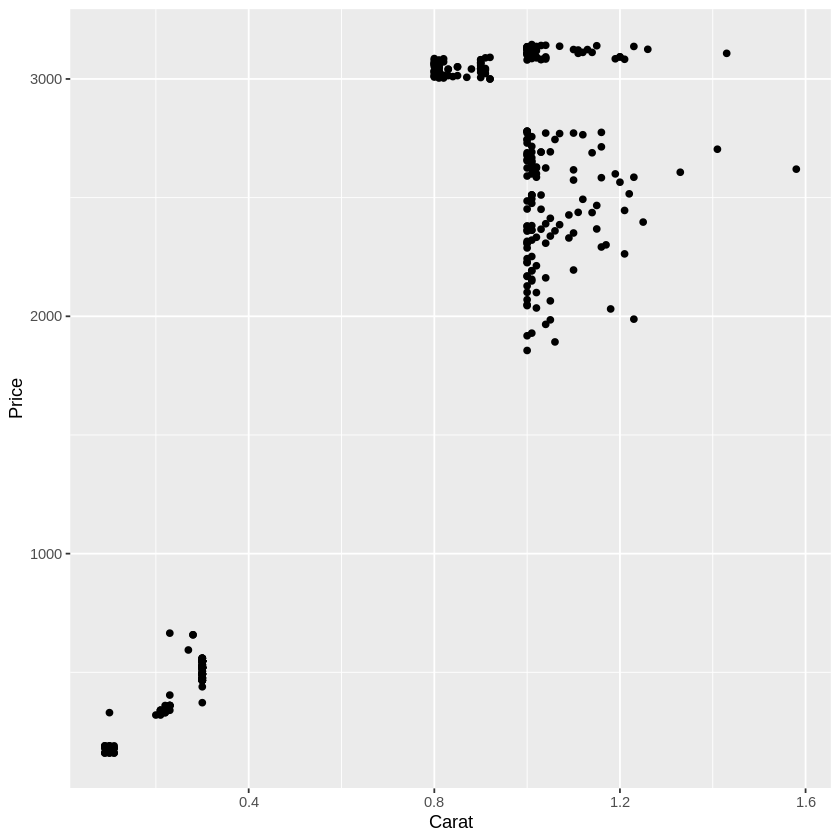

In [387]:
# Plotting a scatter plot for Carat and Price
ggplot(df)  + 
  geom_point(aes(x = Carat, y = Price))

In [399]:
# Creating high carat, high price dataset 
highPricedf <- df %>%
  filter(Price >= 1500) 
head(highPrice)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C,CutN,CertG,PolishN,Polish2C,SymmetryN
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless,Good,AGS - GIA,Very Good,Very Good - Ideal,Very Good
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless,Very Good,AGS - GIA,Good,Fair - Good,Good
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal,Excellent
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal,Very Good
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow,Very Good,AGS - GIA,Very Good,Very Good - Ideal,Very Good
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Good,Fair - Good,Very Good


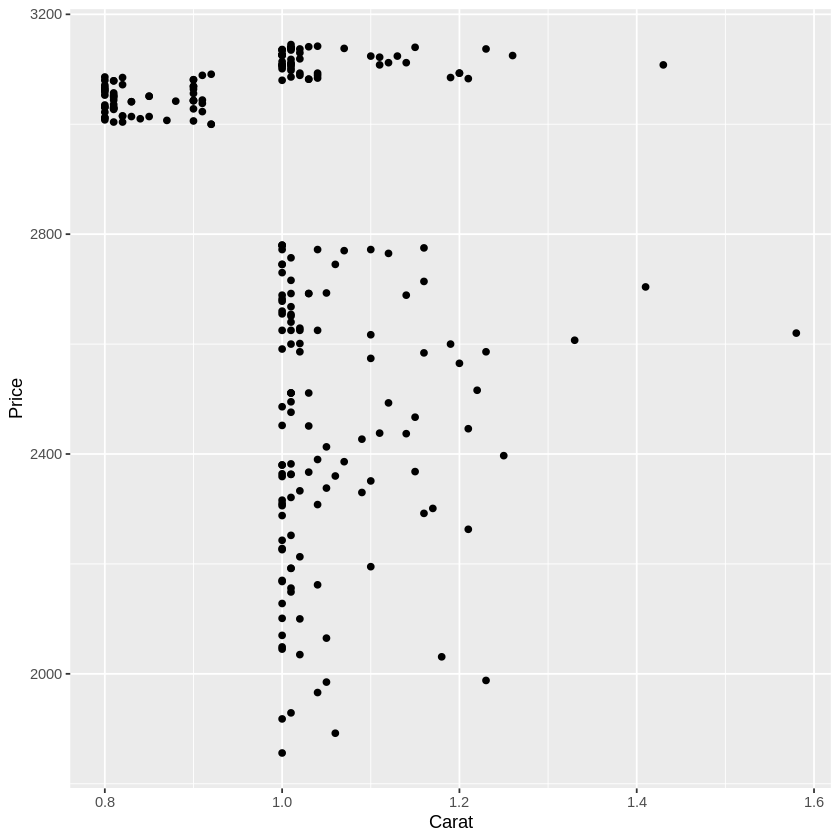

In [467]:
# Plotting a scatter plot for high carat and high price diamonds
ggplot(highPricedf)  + 
  geom_point(aes(x = Carat, y = Price))

In [448]:
# Creating low carat, low price dataset 
lowPricedf <- df %>%
  filter(Price < 1500) 
head(highPrice)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,ClarityN,ColourN,Colour2C,CutN,CertG,PolishN,Polish2C,SymmetryN
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.92,I,SI2,G,AGS,V,V,3000,1,SI2,Near Colorless,Colorless,Good,AGS - GIA,Very Good,Very Good - Ideal,Very Good
2,0.92,I,SI2,V,AGS,G,G,3000,1,SI2,Near Colorless,Colorless,Very Good,AGS - GIA,Good,Fair - Good,Good
3,0.82,F,SI2,I,GIA,X,X,3004,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal,Excellent
4,0.81,G,SI1,I,GIA,X,V,3004,1,SI1,Near Colorless,Colorless,Ideal,AGS - GIA,Excllent,Very Good - Ideal,Very Good
5,0.90,J,VS2,V,GIA,V,V,3006,1,VS2,Faint Yellow,Yellow,Very Good,AGS - GIA,Very Good,Very Good - Ideal,Very Good
6,0.87,F,SI2,I,AGS,G,V,3007,1,SI2,Colorless,Colorless,Ideal,AGS - GIA,Good,Fair - Good,Very Good


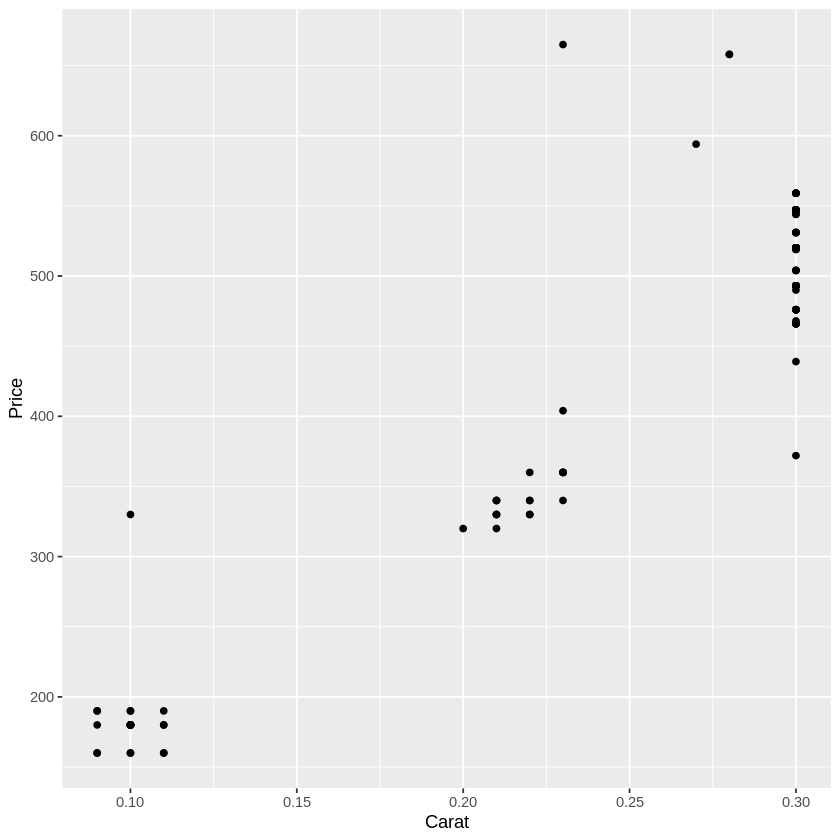

In [468]:
# Plotting a scatter plot for low carat and low price diamonds
ggplot(lowPricedf)  + 
  geom_point(aes(x = Carat, y = Price))

After plotting a scatter plot for Carat vs Price, we apparently noticed that there were two clusters formed. One cluster had diamond prices lower than \$1500 and had carat less that 0.30. Another cluster had price greater than \$1500 and carat greater that 0.30. We can also see that there is an increasing trend between Carat and Price. As the carat increases, price of the diamond also increases.

# Simple Linear Regression

In [478]:
# running a simple linear regression model with Price as a response variable and Carat as explanatory variable 
priceCarat <- lm(formula = Price ~ Carat, data = highPricedf)

# model summary
summary(priceCarat)
summ(priceCarat)


Call:
lm(formula = Price ~ Carat, data = highPricedf)

Residuals:
   Min     1Q Median     3Q    Max 
-904.4 -245.2   76.3  336.7  769.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3741.0      185.4  20.176  < 2e-16 ***
Carat         -980.6      183.5  -5.345 2.12e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 347.9 on 238 degrees of freedom
Multiple R-squared:  0.1072,	Adjusted R-squared:  0.1034 
F-statistic: 28.56 on 1 and 238 DF,  p-value: 2.12e-07


MODEL INFO:
Observations: 240
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(1,238) = 28.56, p = 0.00
R² = 0.11
Adj. R² = 0.10 

Standard errors: OLS
----------------------------------------------------
                       Est.     S.E.   t val.      p
----------------- --------- -------- -------- ------
(Intercept)         3740.98   185.42    20.18   0.00
Carat               -980.60   183.48    -5.34   0.00
----------------------------------------------------

There is some correlation between Carat and Price variables as the R-squared is around 11%. But the regression coefficient of Carat is negative, which is unexpected as high carat diamonds must have high price. Carat has a p-value of 2.12e-07. Since this value is in the range [0, 0.001], it has a significance code of ***. Hence, Carat is statistically significant predictor of diamond price.

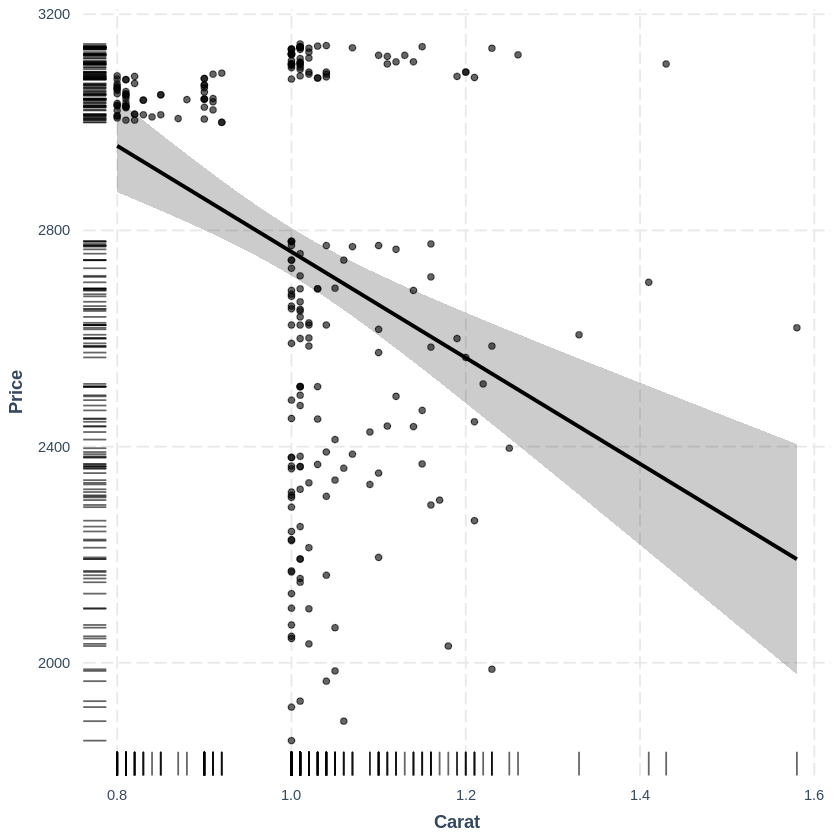

In [479]:
# Plotting a simple linear regression model with Price as a response variable and Carat as explanatory variable 
effect_plot(priceCarat, pred = Carat, interval = TRUE, plot.points = TRUE, rug = TRUE, partial.residuals = TRUE)

In [498]:
# running a simple linear regression model with Price as a response variable and ClarityN as explanatory variable 
priceClarityN <- lm(formula = Price ~ ClarityN, data = df)

# model summary
summary(priceClarityN)
summ(priceClarityN)


Call:
lm(formula = Price ~ ClarityN, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2119.9  -556.7  -247.6   645.7  2252.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2491.93      93.92  26.532  < 2e-16 ***
ClarityNSI1 -1444.32     131.10 -11.017  < 2e-16 ***
ClarityNSI2  -394.38     126.32  -3.122  0.00192 ** 
ClarityNVS1 -1354.16     202.90  -6.674 7.59e-11 ***
ClarityNVS2 -1651.70     170.40  -9.693  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 985.1 on 435 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3044,	Adjusted R-squared:  0.298 
F-statistic: 47.58 on 4 and 435 DF,  p-value: < 2.2e-16


MODEL INFO:
Observations: 440 (1 missing obs. deleted)
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(4,435) = 47.58, p = 0.00
R² = 0.30
Adj. R² = 0.30 

Standard errors: OLS
-----------------------------------------------------
                        Est.     S.E.   t val.      p
----------------- ---------- -------- -------- ------
(Intercept)          2491.93    93.92    26.53   0.00
ClarityNSI1         -1444.32   131.10   -11.02   0.00
ClarityNSI2          -394.38   126.32    -3.12   0.00
ClarityNVS1         -1354.16   202.90    -6.67   0.00
ClarityNVS2         -1651.70   170.40    -9.69   0.00
-----------------------------------------------------

The R-squared is reasonably high at around 30%, which indicated strong correlation between Price and Clarity. Since clarity's p-value value is in the range [0, 0.001], it has a significance code of ***. Hence, Carat is statistically significant predictor of diamond price.

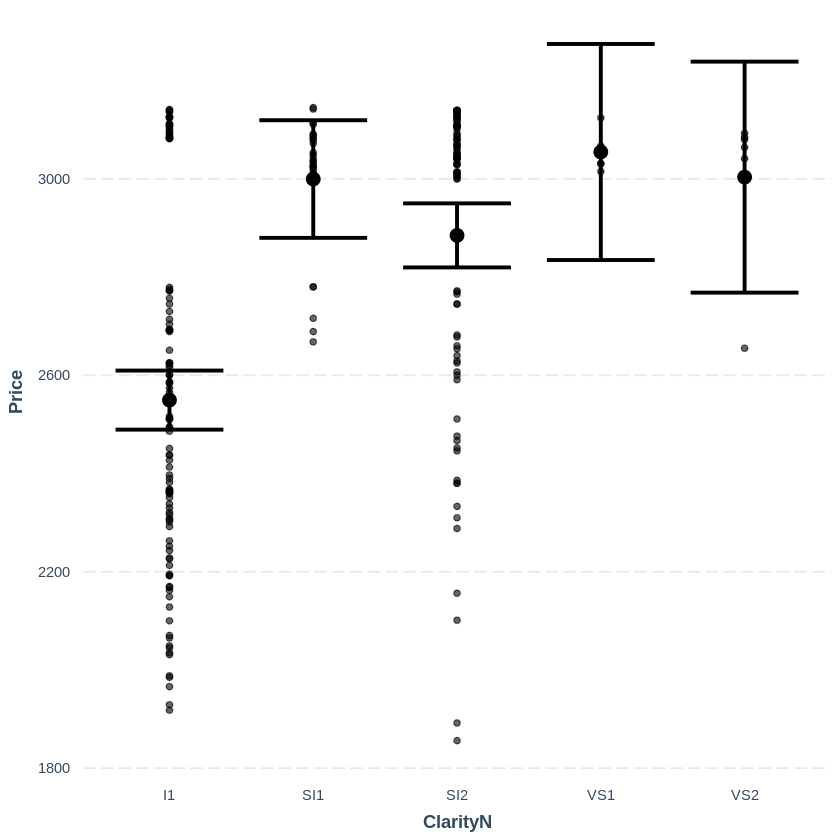

In [483]:
# Plotting a simple linear regression model with Price as a response variable and ClarityN as explanatory variable 
effect_plot(priceClarityN, pred = ClarityN, interval = TRUE, plot.points = TRUE, rug = TRUE, partial.residuals = TRUE)

In [486]:
# running a simple linear regression model with Price as a response variable and CertG as explanatory variable 
priceCertG <- lm(formula = Price ~ CertG, data = highPricedf)

# model summary
summary(priceCertG)
summ(priceCertG)


Call:
lm(formula = Price ~ CertG, data = highPricedf)

Residuals:
   Min     1Q Median     3Q    Max 
-924.1 -283.4  132.7  242.1  472.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2842.11      32.70  86.927   <2e-16 ***
CertGRest    -169.67      46.24  -3.669    3e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 358.2 on 238 degrees of freedom
Multiple R-squared:  0.05354,	Adjusted R-squared:  0.04957 
F-statistic: 13.46 on 1 and 238 DF,  p-value: 0.0003001


MODEL INFO:
Observations: 240
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(1,238) = 13.46, p = 0.00
R² = 0.05
Adj. R² = 0.05 

Standard errors: OLS
---------------------------------------------------
                       Est.    S.E.   t val.      p
----------------- --------- ------- -------- ------
(Intercept)         2842.11   32.70    86.93   0.00
CertGRest           -169.67   46.24    -3.67   0.00
---------------------------------------------------

After clubbing the categories, we observed that the R-squared is around 5%, which is noticeable.

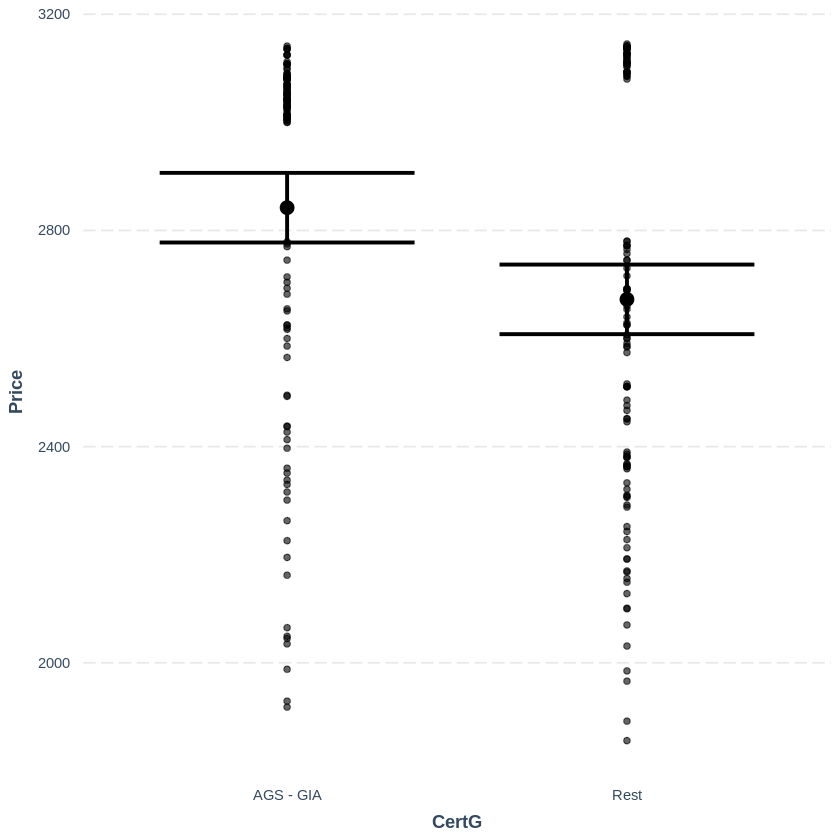

In [487]:
# Plotting a simple linear regression model with Price as a response variable and CertG as explanatory variable 
effect_plot(priceCertG, pred = CertG, interval = TRUE, plot.points = TRUE, rug = TRUE, partial.residuals = TRUE)

In [490]:
# running a simple linear regression model with Price as a response variable and CutN as explanatory variable 
priceCutN <- lm(formula = Price ~ CutN, data = highPricedf)

# model summary
summary(priceCutN)
summ(priceCutN)


Call:
lm(formula = Price ~ CutN, data = highPricedf)

Residuals:
    Min      1Q  Median      3Q     Max 
-784.76 -250.84   47.48  269.99  578.16 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2739.51      38.81  70.582  < 2e-16 ***
CutNFair       -179.67      60.04  -2.993 0.003061 ** 
CutNGood         11.25      70.44   0.160 0.873234    
CutNIdeal       152.02      64.17   2.369 0.018643 *  
CutNVery Good   263.01      76.54   3.436 0.000698 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 342.8 on 235 degrees of freedom
Multiple R-squared:  0.144,	Adjusted R-squared:  0.1294 
F-statistic: 9.881 on 4 and 235 DF,  p-value: 2.094e-07


MODEL INFO:
Observations: 240
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(4,235) = 9.88, p = 0.00
R² = 0.14
Adj. R² = 0.13 

Standard errors: OLS
-----------------------------------------------------
                         Est.    S.E.   t val.      p
------------------- --------- ------- -------- ------
(Intercept)           2739.51   38.81    70.58   0.00
CutNFair              -179.67   60.04    -2.99   0.00
CutNGood                11.25   70.44     0.16   0.87
CutNIdeal              152.02   64.17     2.37   0.02
CutNVery Good          263.01   76.54     3.44   0.00
-----------------------------------------------------

Here, the R-suared is 14%, which is considered as good.It also has high significance level. So, overall it's a good feature.

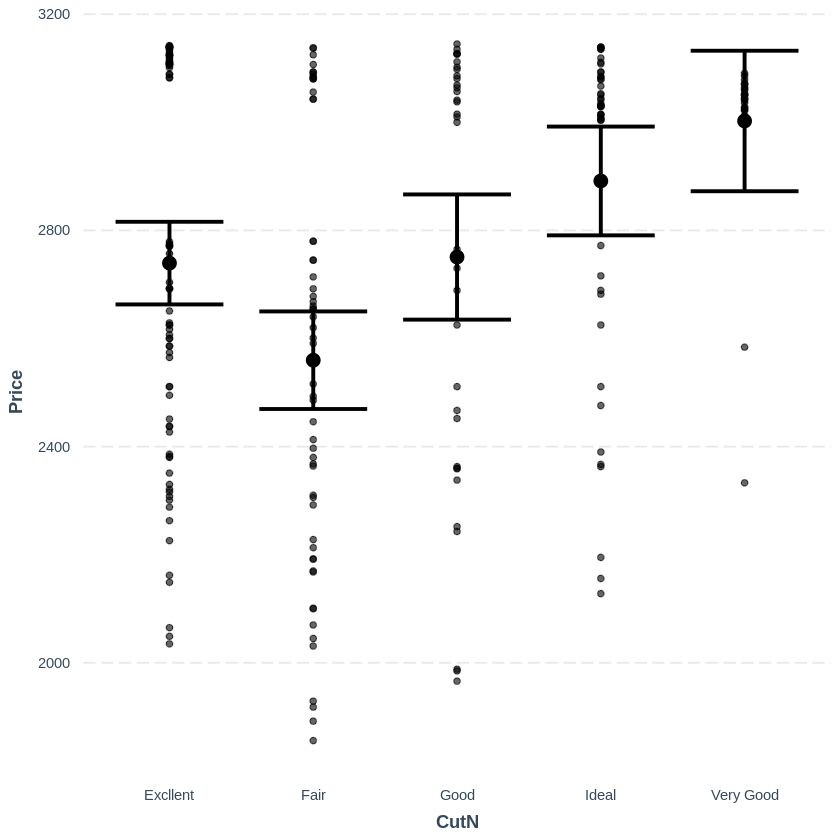

In [491]:
# Plotting a simple linear regression model with Price as a response variable and CutN as explanatory variable 
effect_plot(priceCutN, pred = CutN, interval = TRUE, plot.points = TRUE, rug = TRUE, partial.residuals = TRUE)

In [492]:
# running a simple linear regression model with Price as a response variable and Polish2C as explanatory variable 
pricePolish2C <- lm(formula = Price ~ Polish2C, data = highPricedf)

# model summary
summary(pricePolish2C)
summ(pricePolish2C)


Call:
lm(formula = Price ~ Polish2C, data = highPricedf)

Residuals:
   Min     1Q Median     3Q    Max 
-958.8 -251.8  129.2  231.2  515.1 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2629.90      32.07  82.015  < 2e-16 ***
Polish2CVery Good - Ideal   246.88      44.88   5.501 9.78e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 346.8 on 237 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1132,	Adjusted R-squared:  0.1095 
F-statistic: 30.26 on 1 and 237 DF,  p-value: 9.779e-08


MODEL INFO:
Observations: 239 (1 missing obs. deleted)
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(1,237) = 30.26, p = 0.00
R² = 0.11
Adj. R² = 0.11 

Standard errors: OLS
-----------------------------------------------------------------
                                     Est.    S.E.   t val.      p
------------------------------- --------- ------- -------- ------
(Intercept)                       2629.90   32.07    82.01   0.00
Polish2CVery Good - Ideal          246.88   44.88     5.50   0.00
-----------------------------------------------------------------

The R-squared is 11%, which indicates good correlation between Price and Polish. Polish is statistically significant predictor of diamond price.

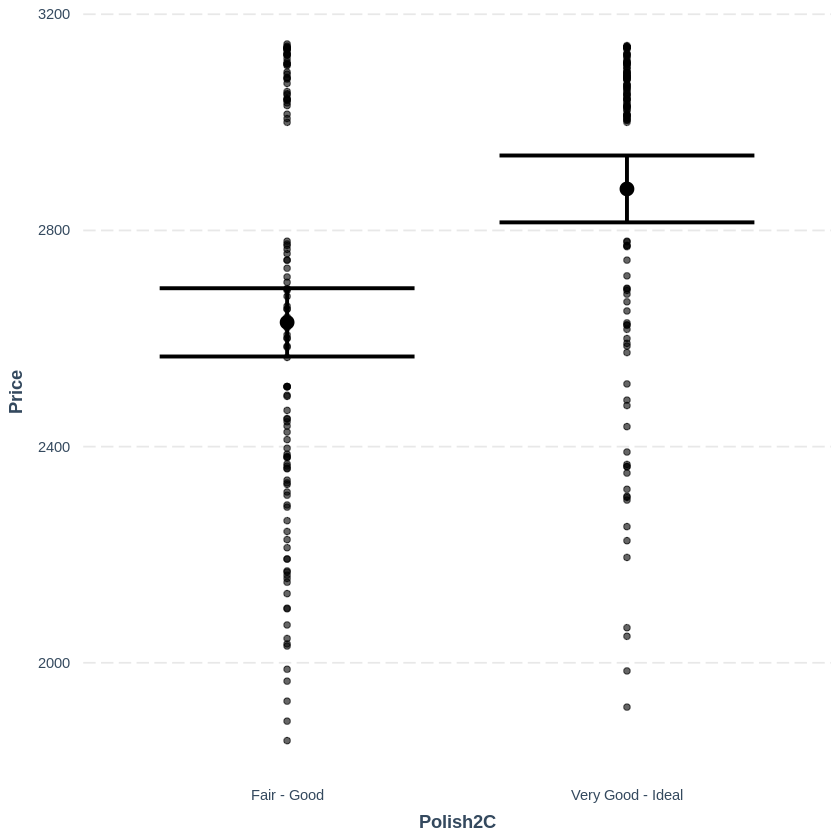

In [493]:
# Plotting a simple linear regression model with Price as a response variable and Polish2C as explanatory variable 
effect_plot(pricePolish2C, pred = Polish2C, interval = TRUE, plot.points = TRUE, rug = TRUE, partial.residuals = TRUE)

In [499]:
# running a simple linear regression model with Price as a response variable and SymmetryN as explanatory variable 
priceSymmetryN <- lm(formula = Price ~ SymmetryN, data = df)

# model summary
summary(priceSymmetryN)
summ(priceSymmetryN)


Call:
lm(formula = Price ~ SymmetryN, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1734.4  -945.8   115.6  1171.6  1679.5 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1759.3      160.2  10.984   <2e-16 ***
SymmetryNFair         673.0      296.6   2.269   0.0238 *  
SymmetryNGood         135.1      184.4   0.733   0.4641    
SymmetryNIdeal       1288.1      536.0   2.403   0.0167 *  
SymmetryNVery Good   -293.8      178.9  -1.642   0.1013    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1144 on 435 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.06206,	Adjusted R-squared:  0.05343 
F-statistic: 7.195 on 4 and 435 DF,  p-value: 1.288e-05


MODEL INFO:
Observations: 440 (1 missing obs. deleted)
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(4,435) = 7.20, p = 0.00
R² = 0.06
Adj. R² = 0.05 

Standard errors: OLS
-----------------------------------------------------------
                              Est.     S.E.   t val.      p
------------------------ --------- -------- -------- ------
(Intercept)                1759.33   160.17    10.98   0.00
SymmetryNFair               672.95   296.58     2.27   0.02
SymmetryNGood               135.10   184.36     0.73   0.46
SymmetryNIdeal             1288.07   536.03     2.40   0.02
SymmetryNVery Good         -293.81   178.90    -1.64   0.10
-----------------------------------------------------------

The R-squared is just around 6%, which indicated not so good correlation between Price and Symmetry. Since Since it has no significance code, it's not a statistically significant predictor of diamond price.

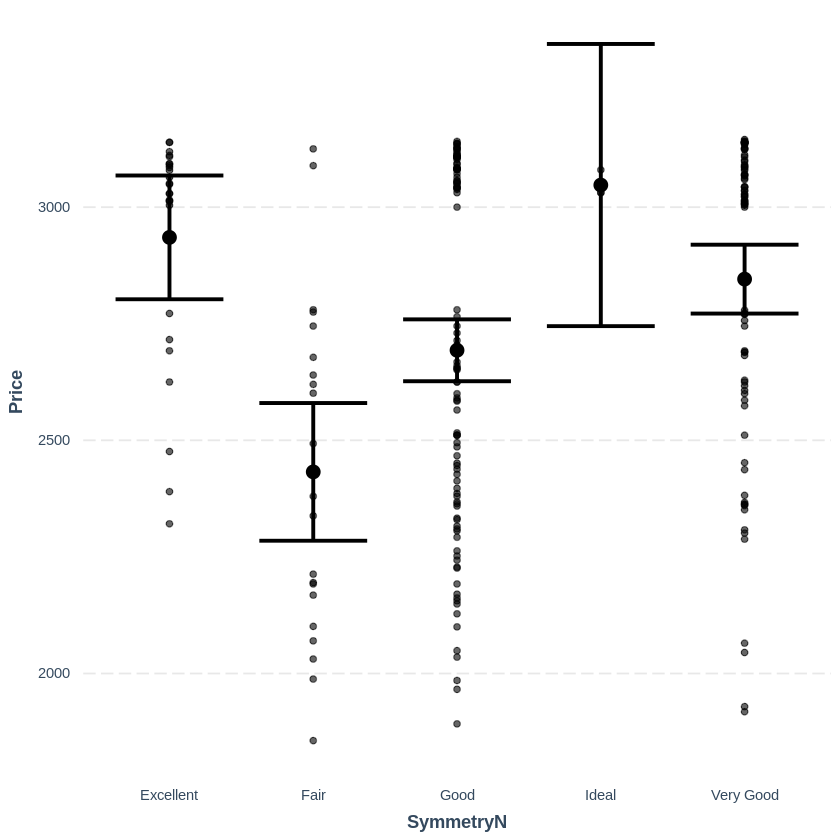

In [495]:
# Plotting a simple linear regression model with Price as a response variable and SymmetryN as explanatory variable 
effect_plot(priceSymmetryN, pred = SymmetryN, interval = TRUE, plot.points = TRUE, rug = TRUE, partial.residuals = TRUE)

In [496]:
# running a simple linear regression model with Price as a response variable and Colour2C as explanatory variable 
priceColour2C <- lm(formula = Price ~ Colour2C, data = highPricedf)

# model summary
summary(priceColour2C)
summ(priceColour2C)


Call:
lm(formula = Price ~ Colour2C, data = highPricedf)

Residuals:
   Min     1Q Median     3Q    Max 
-866.2 -284.2  152.4  290.8  465.1 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2795.25      28.70  97.411   <2e-16 ***
Colour2CYellow  -115.36      50.02  -2.307   0.0219 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 364.1 on 238 degrees of freedom
Multiple R-squared:  0.02186,	Adjusted R-squared:  0.01775 
F-statistic:  5.32 on 1 and 238 DF,  p-value: 0.02194


MODEL INFO:
Observations: 240
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(1,238) = 5.32, p = 0.02
R² = 0.02
Adj. R² = 0.02 

Standard errors: OLS
------------------------------------------------------
                          Est.    S.E.   t val.      p
-------------------- --------- ------- -------- ------
(Intercept)            2795.25   28.70    97.41   0.00
Colour2CYellow         -115.36   50.02    -2.31   0.02
------------------------------------------------------

R-square is just around 2%, which is low. It a sign of weak correlation.

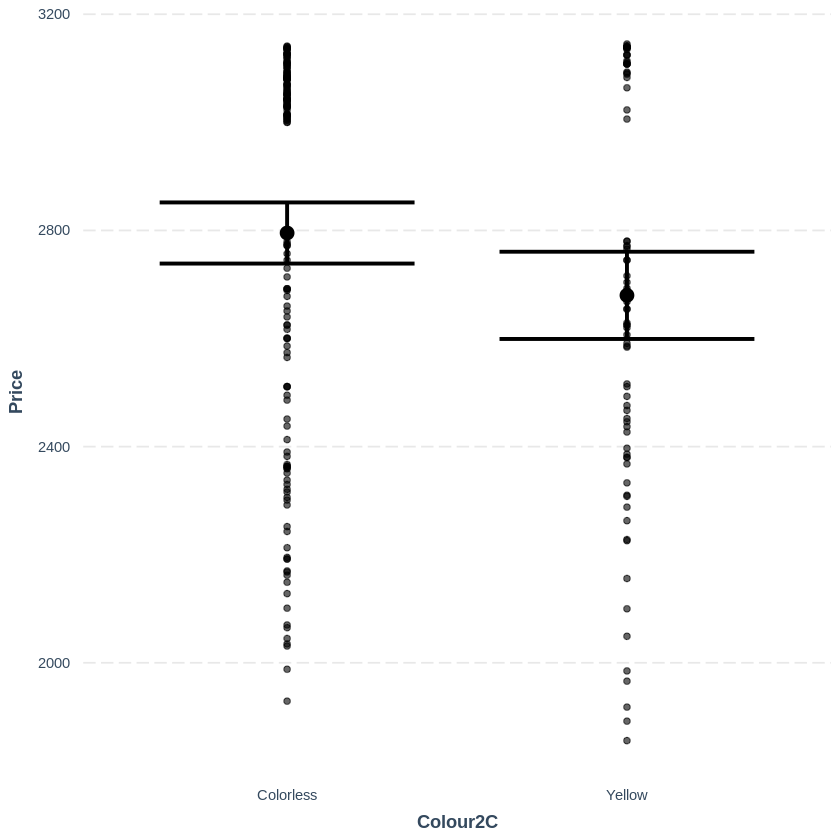

In [497]:
# Plotting a simple linear regression model with Price as a response variable and Colour2C as explanatory variable 
effect_plot(priceColour2C, pred = Colour2C, interval = TRUE, plot.points = TRUE, rug = TRUE, partial.residuals = TRUE)

# Multiple Linear Regression

In [452]:
# running a multiple linear regression model with Price as a response variable and CutN, Colour2C, ClarityN, CertG, Polish2C, Carat as explanatory variable 
priceMulti <- lm(formula = Price ~ CutN + Colour2C + ClarityN + CertG + Polish2C + Carat, data = highPricedf)

# model summary
summary(priceMulti)
summ(priceMulti)


Call:
lm(formula = Price ~ CutN + Colour2C + ClarityN + CertG + Polish2C + 
    Carat, data = highPricedf)

Residuals:
    Min      1Q  Median      3Q     Max 
-724.26 -172.69   14.22  149.85  754.61 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1856.92     254.42   7.299 4.90e-12 ***
CutNFair                   -162.86      51.74  -3.147  0.00187 ** 
CutNGood                    -73.01      60.78  -1.201  0.23092    
CutNIdeal                   -64.09      60.58  -1.058  0.29116    
CutNVery Good               -26.28      78.13  -0.336  0.73694    
Colour2CYellow             -274.47      48.42  -5.669 4.36e-08 ***
ClarityNSI1                 567.66      78.22   7.258 6.26e-12 ***
ClarityNSI2                 452.52      51.08   8.860 2.42e-16 ***
ClarityNVS1                 578.61     114.80   5.040 9.53e-07 ***
ClarityNVS2                 617.95     122.73   5.035 9.75e-07 ***
CertGRest                   -81.51      41.08 

MODEL INFO:
Observations: 239 (1 missing obs. deleted)
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(12,226) = 15.11, p = 0.00
R² = 0.45
Adj. R² = 0.42 

Standard errors: OLS
------------------------------------------------------------------
                                     Est.     S.E.   t val.      p
------------------------------- --------- -------- -------- ------
(Intercept)                       1856.92   254.42     7.30   0.00
CutNFair                          -162.86    51.74    -3.15   0.00
CutNGood                           -73.01    60.78    -1.20   0.23
CutNIdeal                          -64.09    60.58    -1.06   0.29
CutNVery Good                      -26.28    78.13    -0.34   0.74
Colour2CYellow                    -274.47    48.42    -5.67   0.00
ClarityNSI1                        567.66    78.22     7.26   0.00
ClarityNSI2                        452.52    51.08     8.86   0.00
ClarityNVS1                        578.61   114.80     5.04   0.0

Here, R-squared is 45% and adjusted R-squared is 42%, which is fairly high. This model is statistically significant predictor of the price of the diamond.

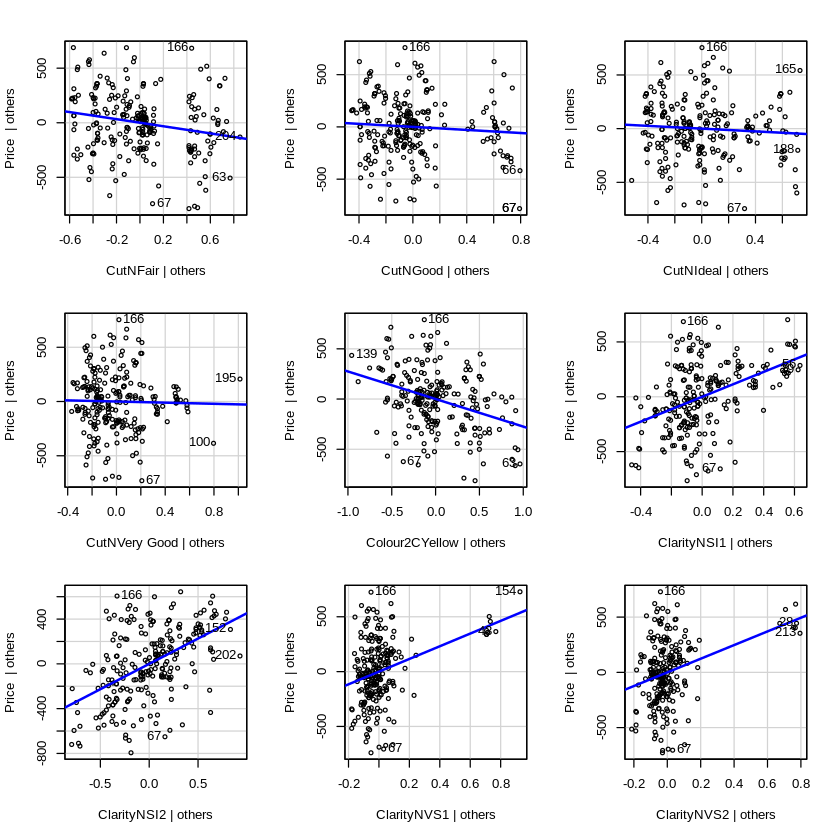

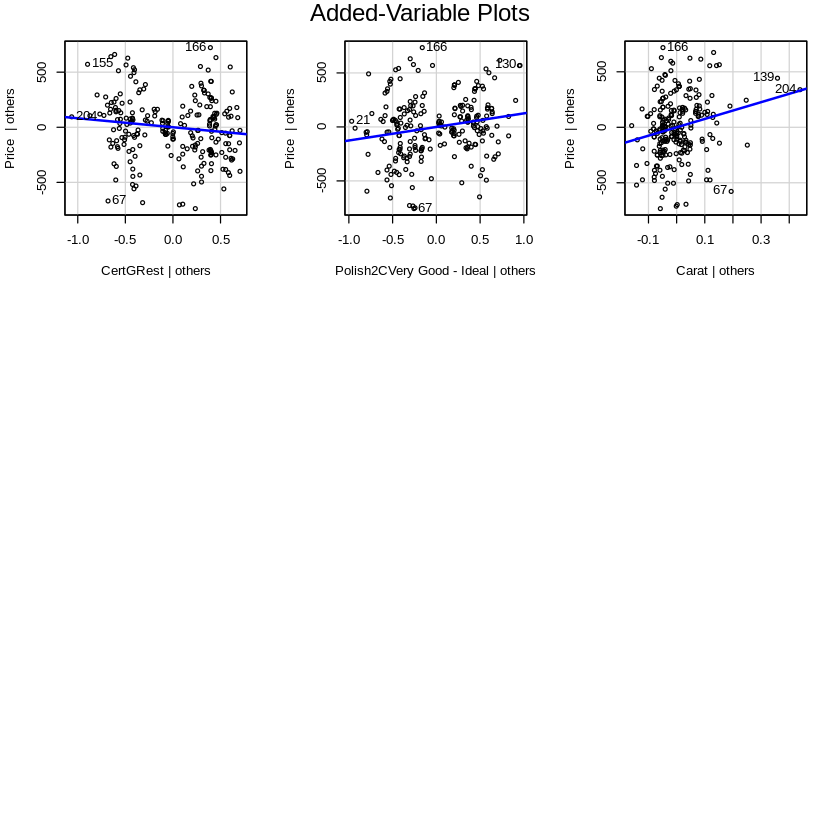

In [463]:
# Plotting a multiple linear regression model with Price as a response variable and CutN, Colour2C, ClarityN, CertG, Polish2C, Carat as explanatory variable
avPlots(priceMulti)

In [450]:
# running a multiple linear regression model with Price as a response variable and Colour2C, ClarityN, CertG, Polish2C, Carat as explanatory variable 
priceMulti2 <- lm(formula = Price ~ Colour2C + ClarityN + CertG + Polish2C + Carat, data = lowPricedf)

# model summary
summary(priceMulti2)
summ(priceMulti2)


Call:
lm(formula = Price ~ Colour2C + ClarityN + CertG + Polish2C + 
    Carat, data = lowPricedf)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.513 -18.166   0.544   8.834 260.891 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -11.759     30.936  -0.380 0.704289    
Colour2CYellow             -59.909      7.772  -7.708 6.81e-13 ***
ClarityNSI1                 90.922     18.825   4.830 2.79e-06 ***
ClarityNSI2                 70.693     19.005   3.720 0.000262 ***
ClarityNVS1                124.920     20.798   6.006 9.40e-09 ***
ClarityNVS2                121.845     19.371   6.290 2.12e-09 ***
CertGRest                  -61.082     13.382  -4.565 8.95e-06 ***
Polish2CVery Good - Ideal   13.730      5.862   2.342 0.020197 *  
Carat                     1484.240     82.658  17.956  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.85 on 191 degrees of free

MODEL INFO:
Observations: 200 (1 missing obs. deleted)
Dependent Variable: Price
Type: OLS linear regression 

MODEL FIT:
F(8,191) = 330.33, p = 0.00
R² = 0.93
Adj. R² = 0.93 

Standard errors: OLS
-----------------------------------------------------------------
                                     Est.    S.E.   t val.      p
------------------------------- --------- ------- -------- ------
(Intercept)                        -11.76   30.94    -0.38   0.70
Colour2CYellow                     -59.91    7.77    -7.71   0.00
ClarityNSI1                         90.92   18.82     4.83   0.00
ClarityNSI2                         70.69   19.01     3.72   0.00
ClarityNVS1                        124.92   20.80     6.01   0.00
ClarityNVS2                        121.84   19.37     6.29   0.00
CertGRest                          -61.08   13.38    -4.56   0.00
Polish2CVery Good - Ideal           13.73    5.86     2.34   0.02
Carat                             1484.24   82.66    17.96   0.00
----------

Here, the R-squared is extremely high, coming at 93%. 

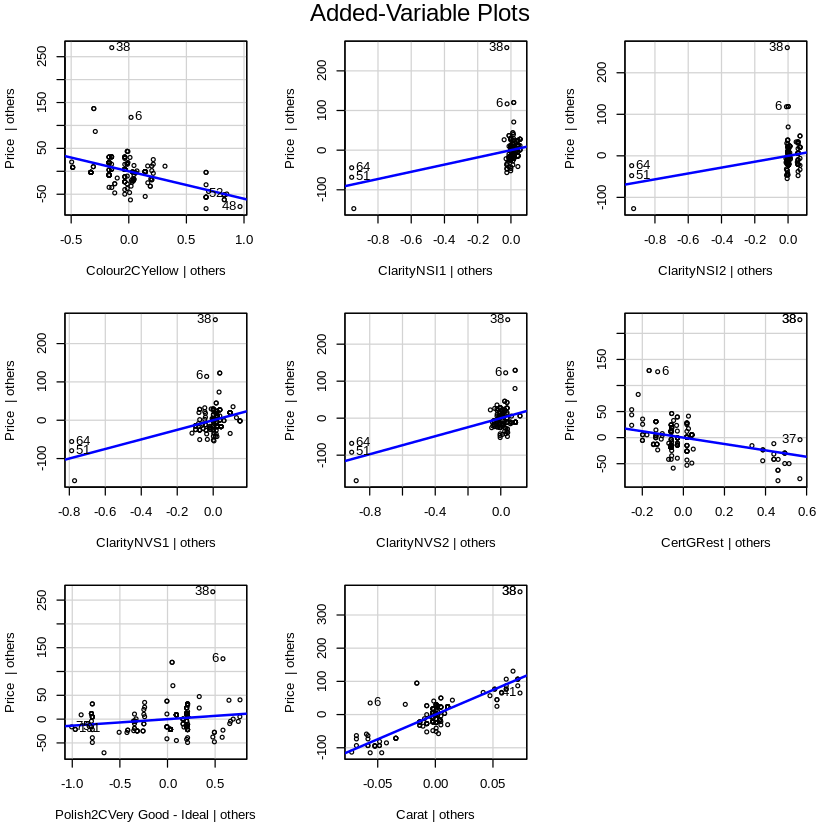

In [464]:
# Plotting a multiple linear regression model with Price as a response variable and Colour2C, ClarityN, CertG, Polish2C, Carat as explanatory variable
avPlots(priceMulti2)

# Observations and Comments

The price of the diamond was mostly determined by carat, clarity, and colour. Cut, Certification, and Polish were the next best determinants. Symmetry had no effect on determining the price of the diamond.